In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/youtube-new/GBvideos.csv
/kaggle/input/youtube-new/MXvideos.csv
/kaggle/input/youtube-new/KRvideos.csv
/kaggle/input/youtube-new/MX_category_id.json
/kaggle/input/youtube-new/GB_category_id.json
/kaggle/input/youtube-new/US_category_id.json
/kaggle/input/youtube-new/IN_category_id.json
/kaggle/input/youtube-new/DEvideos.csv
/kaggle/input/youtube-new/KR_category_id.json
/kaggle/input/youtube-new/RU_category_id.json
/kaggle/input/youtube-new/FRvideos.csv
/kaggle/input/youtube-new/USvideos.csv
/kaggle/input/youtube-new/INvideos.csv
/kaggle/input/youtube-new/RUvideos.csv
/kaggle/input/youtube-new/CA_category_id.json
/kaggle/input/youtube-new/DE_category_id.json
/kaggle/input/youtube-new/JP_category_id.json
/kaggle/input/youtube-new/JPvideos.csv
/kaggle/input/youtube-new/FR_category_id.json
/kaggle/input/youtube-new/CAvideos.csv


# **Importing Packages**

In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns

import warnings
from collections import Counter
import datetime
import wordcloud
import json

In [3]:
# Hiding warnings for cleaner display
warnings.filterwarnings('ignore')

# Configuring some options
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
# If you want interactive plots, uncomment the next line
# %matplotlib notebook

# **Reading the dataset**

In [4]:
df=pd.read_csv("../input/youtube-new/USvideos.csv")

# **Getting to the dataset more**

In [5]:
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [6]:
print(df.shape)

(40949, 16)


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40949 non-null  object
 1   trending_date           40949 non-null  object
 2   title                   40949 non-null  object
 3   channel_title           40949 non-null  object
 4   category_id             40949 non-null  int64 
 5   publish_time            40949 non-null  object
 6   tags                    40949 non-null  object
 7   views                   40949 non-null  int64 
 8   likes                   40949 non-null  int64 
 9   dislikes                40949 non-null  int64 
 10  comment_count           40949 non-null  int64 
 11  thumbnail_link          40949 non-null  object
 12  comments_disabled       40949 non-null  bool  
 13  ratings_disabled        40949 non-null  bool  
 14  video_error_or_removed  40949 non-null  bool  
 15  de

In [8]:
df.dtypes

video_id                  object
trending_date             object
title                     object
channel_title             object
category_id                int64
publish_time              object
tags                      object
views                      int64
likes                      int64
dislikes                   int64
comment_count              int64
thumbnail_link            object
comments_disabled           bool
ratings_disabled            bool
video_error_or_removed      bool
description               object
dtype: object

# **Data Wrangling**

**Data Cleaning**

The description column has some null values. These are some of the rows whose description values are null. We can see that null values are denoted by NaN

In [9]:
df[df["description"].apply(lambda x: pd.isna(x))].head(3)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
42,NZFhMSgbKKM,17.14.11,Dennis Smith Jr. and LeBron James go back and ...,Ben Rohrbach,17,2017-11-13T15:11:00.000Z,[none],945,7,5,8,https://i.ytimg.com/vi/NZFhMSgbKKM/default.jpg,False,False,False,NaN
47,sbcbvuitiTc,17.14.11,Stephon Marbury and Jimmer Fredette fight in C...,NBA Highlights · YouTube,17,2017-11-10T18:23:05.000Z,"NBA|""Basketball""|""Sports""",956169,2017,2425,1447,https://i.ytimg.com/vi/sbcbvuitiTc/default.jpg,False,False,False,NaN
175,4d07RXYLsJE,17.14.11,Sphaera - demonstrating interaction,Jenny Hanell,28,2017-11-04T20:48:16.000Z,[none],1827,3,0,2,https://i.ytimg.com/vi/4d07RXYLsJE/default.jpg,False,False,False,NaN


In [10]:
df.isnull().sum()

video_id                    0
trending_date               0
title                       0
channel_title               0
category_id                 0
publish_time                0
tags                        0
views                       0
likes                       0
dislikes                    0
comment_count               0
thumbnail_link              0
comments_disabled           0
ratings_disabled            0
video_error_or_removed      0
description               570
dtype: int64

There are 570 null values in "discription".

In [11]:
df["description"] = df["description"].fillna(value="")

In [12]:
df.isnull().sum()

video_id                  0
trending_date             0
title                     0
channel_title             0
category_id               0
publish_time              0
tags                      0
views                     0
likes                     0
dislikes                  0
comment_count             0
thumbnail_link            0
comments_disabled         0
ratings_disabled          0
video_error_or_removed    0
description               0
dtype: int64

# **Dataset collection - Years**

Let's see in which years the dataset was collected

In [13]:
df['trending_date']=pd.to_datetime(pd.Series(df['trending_date'].apply(lambda x:'20'+x[0:2]+'.'+x[6:]+'.'+x[3:5])))
df['publish_time']=pd.to_datetime(pd.Series(df['publish_time'].apply(lambda x:x[:19])))

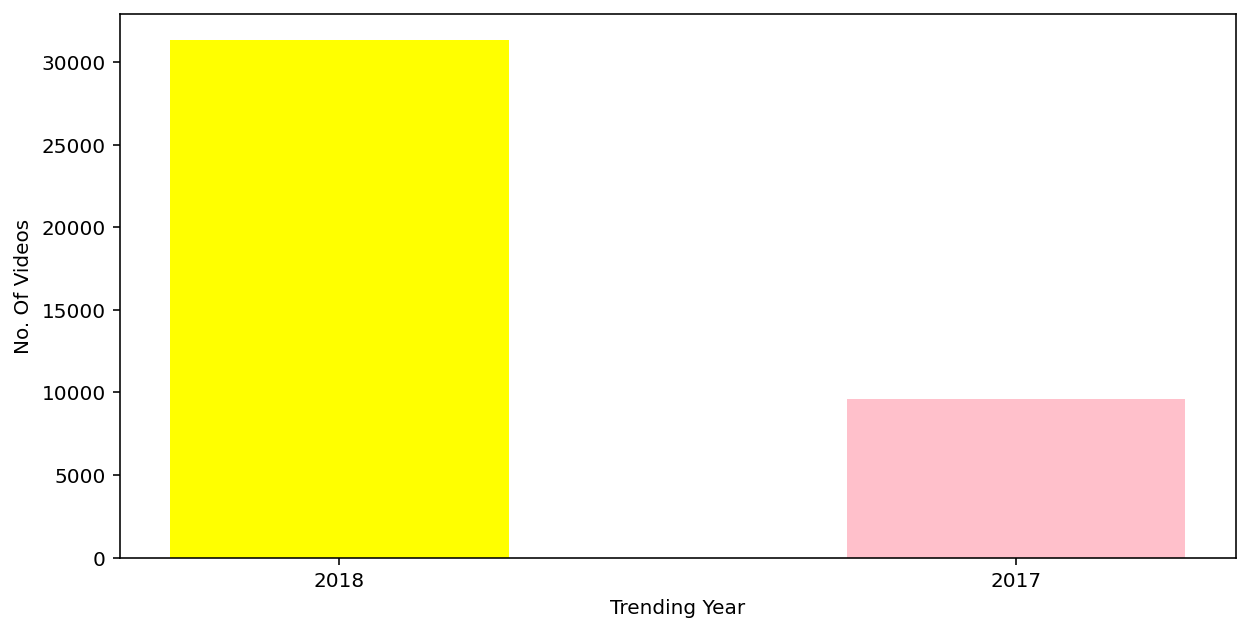

In [14]:
day=df['trending_date'].dt.strftime ('%Y')
my_dict=(day.value_counts()).to_dict()
count= pd.DataFrame(list(my_dict.items()),columns = ['Trending year','No. Of Videos']) 
fig=plt.figure(figsize=(10,5))
plt.bar(count['Trending year'],count['No. Of Videos'],color=['yellow', 'pink', 'cyan'],width=0.5)
plt.xlabel("Trending Year")
plt.ylabel("No. Of Videos")
plt.show()

# **Trending videos and their publishing time**

An example value of the publish_time column in our dataset is 2017-11-13T17:13:01.000Z. And according to information on this page: https://www.w3.org/TR/NOTE-datetime, this means that the date of publishing the video is 2017-11-13 and the time is 17:13:01 in Coordinated Universal Time (UTC) time zone.

Let's add two columns to represent the date and hour of publishing each video, then delete the original publish_time column because we will not need it anymore

Now we can see which days of the week had the largest numbers of trending videos

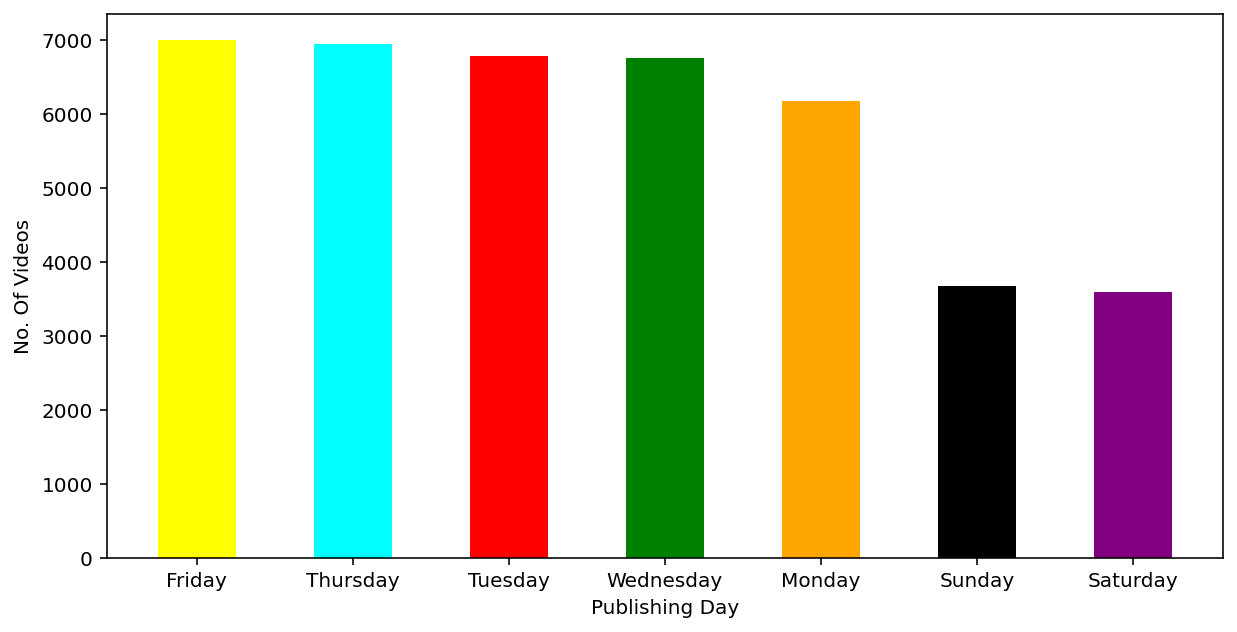

In [15]:
day=df['publish_time'].dt.day_name()
my_dict=(day.value_counts()).to_dict()
count= pd.DataFrame(list(my_dict.items()),columns = ['Publishing Day','No. Of Videos']) 
fig=plt.figure(figsize=(10,5))
plt.bar(count['Publishing Day'],count['No. Of Videos'],color=['yellow', 'cyan', 'red', 'green', 'orange', 'black', 'purple'],width=0.5)
plt.xlabel("Publishing Day")
plt.ylabel("No. Of Videos")
plt.show()

We can see that the number of trending videos published on Sunday and Saturday are noticeably less than the number of trending videos published on other days of the week.

Now let's use publishing_hour column to see which publishing hours had the largest number of trending videos

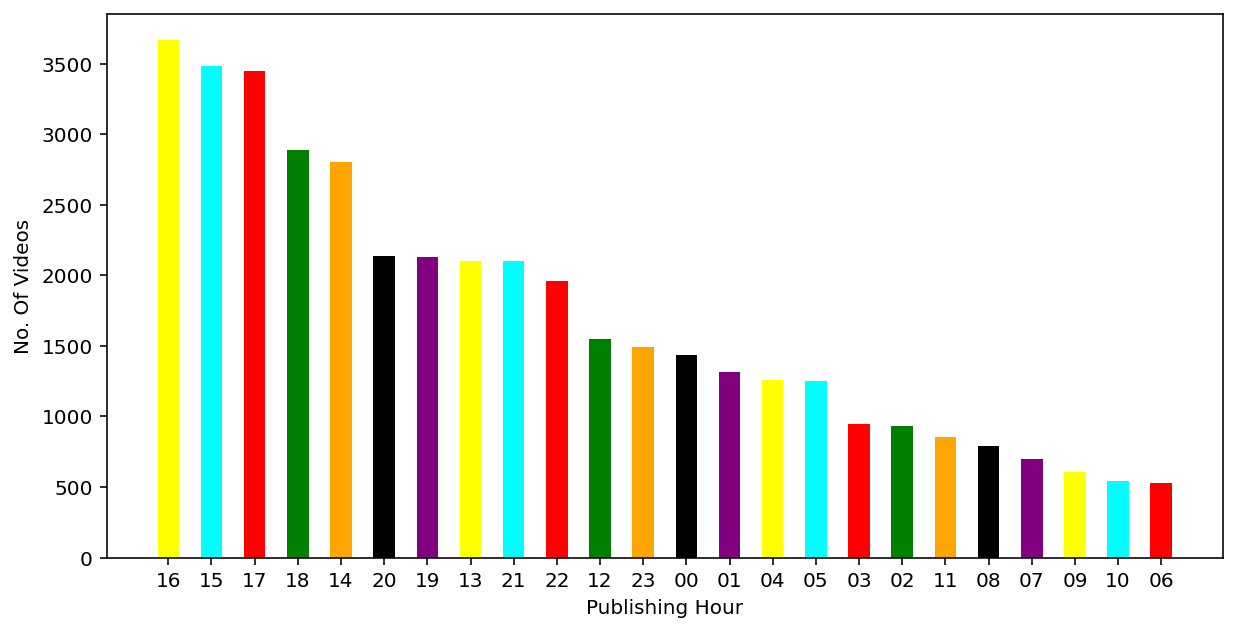

In [16]:
hour=df.publish_time.apply(lambda x: x.strftime("%H"))
my_dict=(hour.value_counts()).to_dict()
count= pd.DataFrame(list(my_dict.items()),columns = ['Publishing Hour','No. Of Videos']) 
fig=plt.figure(figsize=(10,5))
plt.bar(count['Publishing Hour'],count['No. Of Videos'],color=['yellow', 'cyan', 'red', 'green', 'orange', 'black', 'purple'],width=0.5)
plt.xlabel("Publishing Hour")
plt.ylabel("No. Of Videos")
plt.show()

We can see that the period between 2PM and 7PM, peaking between 4PM and 5PM, had the largest number of trending videos. We notice also that the period between 12AM and 1PM has the smallest number of trending videos.

In [17]:
df['trending days_difference']=df.apply(lambda row: (row.trending_date-row.publish_time).days, axis = 1) 
df

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,trending days_difference
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13 17:13:01,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,0
1,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13 07:30:00,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",0
2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12 19:05:24,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,1
3,puqaWrEC7tY,2017-11-14,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13 11:00:04,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,0
4,d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12 18:01:41,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40944,BZt0qjTWNhw,2018-06-14,The Cat Who Caught the Laser,AaronsAnimals,15,2018-05-18 13:00:04,"aarons animals|""aarons""|""animals""|""cat""|""cats""...",1685609,38160,1385,2657,https://i.ytimg.com/vi/BZt0qjTWNhw/default.jpg,False,False,False,The Cat Who Caught the Laser - Aaron's Animals,26
40945,1h7KV2sjUWY,2018-06-14,True Facts : Ant Mutualism,zefrank1,22,2018-05-18 01:00:06,[none],1064798,60008,382,3936,https://i.ytimg.com/vi/1h7KV2sjUWY/default.jpg,False,False,False,,26
40946,D6Oy4LfoqsU,2018-06-14,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,Brad Mondo,24,2018-05-18 17:34:22,I gave safiya nygaard a perfect hair makeover ...,1066451,48068,1032,3992,https://i.ytimg.com/vi/D6Oy4LfoqsU/default.jpg,False,False,False,I had so much fun transforming Safiyas hair in...,26
40947,oV0zkMe1K8s,2018-06-14,How Black Panther Should Have Ended,How It Should Have Ended,1,2018-05-17 17:00:04,"Black Panther|""HISHE""|""Marvel""|""Infinity War""|...",5660813,192957,2846,13088,https://i.ytimg.com/vi/oV0zkMe1K8s/default.jpg,False,False,False,How Black Panther Should Have EndedWatch More ...,27


In [18]:
df['trending days_difference'].replace({-1:0},inplace=True)

In [19]:
print(df['trending days_difference'].max())
print(df['trending days_difference'].min())

4214
0


We can see that some videos trended on the same day they were published and for some videos it took 4214 days to trend after being published.

# **Description of numerical columns**

Now, let's see some statistical information about the numerical columns of our dataset

In [20]:
pd.options.display.float_format = "{:.2f}".format
df.describe()

,category_id,views,likes,dislikes,comment_count,trending days_difference
count,40949.00,40949.00,40949.00,40949.00,40949.00,40949.00
mean,19.97,2360784.64,74266.70,3711.40,8446.80,15.81
std,7.57,7394113.76,228885.34,29029.71,37430.49,146.01
min,1.00,549.00,0.00,0.00,0.00,0.00
25%,17.00,242329.00,5424.00,202.00,614.00,2.00
50%,24.00,681861.00,18091.00,631.00,1856.00,4.00
75%,25.00,1823157.00,55417.00,1938.00,5755.00,8.00
max,43.00,225211923.00,5613827.00,1674420.00,1361580.00,4214.00


We note from the table above that:

The average number of views of a trending video is 2,360,784.

The median value for the number of views is 681,861, which means that half the trending videos have views that are less than that number, and the other half have views larger than that number.

The average number of likes of a trending video is 74,266, while the average number of dislikes is 3,711. 

The Average comment count is 8,446 while the median is 1,856.

How useful are the observations above? Let's examine more.

# **Plotting Histograms**

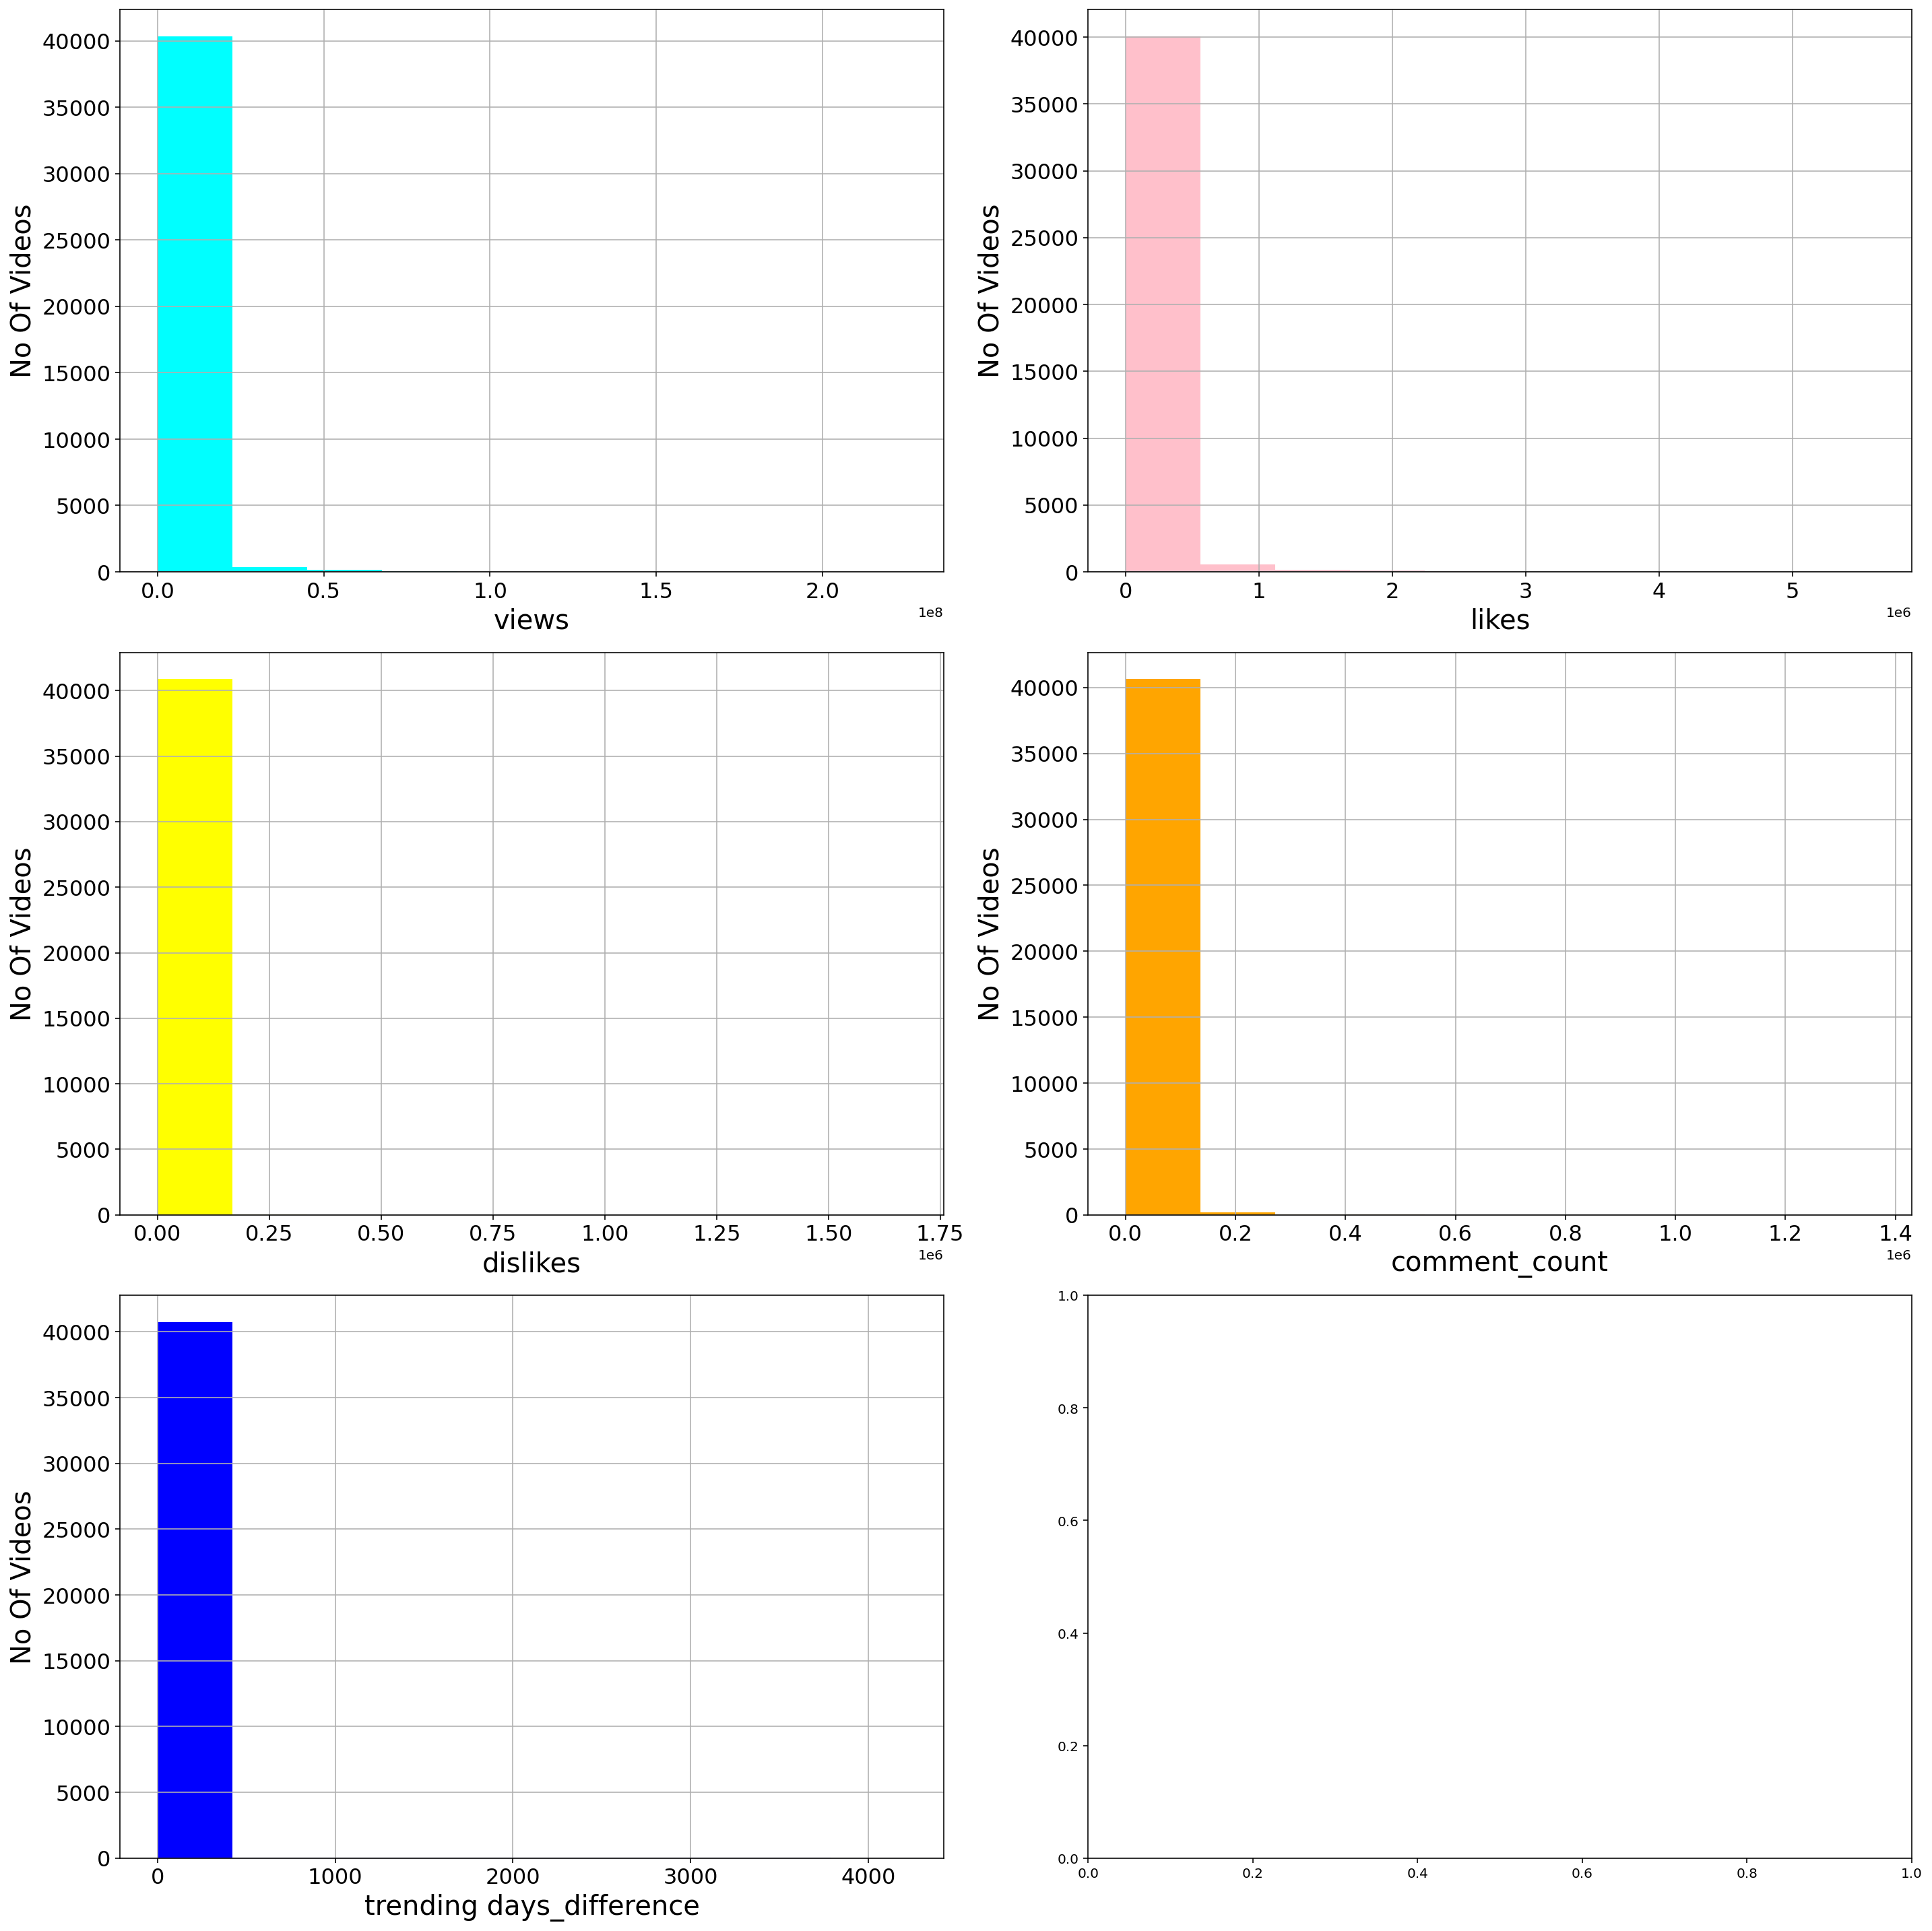

In [21]:
numerical=['views','likes','dislikes','comment_count','trending days_difference']
color=['cyan','pink','yellow','orange','blue']
fig, ax = plt.subplots(3, 2, figsize=(20, 20))
for var,i,subplot in zip(numerical,color, ax.flatten()):
    ax=df[var].hist(ax=subplot,ylabelsize=16,xlabelsize=16,color=i)
    ax.set_xlabel(var,fontsize=20)
    ax.set_ylabel("No Of Videos",fontsize=20)
fig.tight_layout()

For a closer look at the histograms we will limit our range.

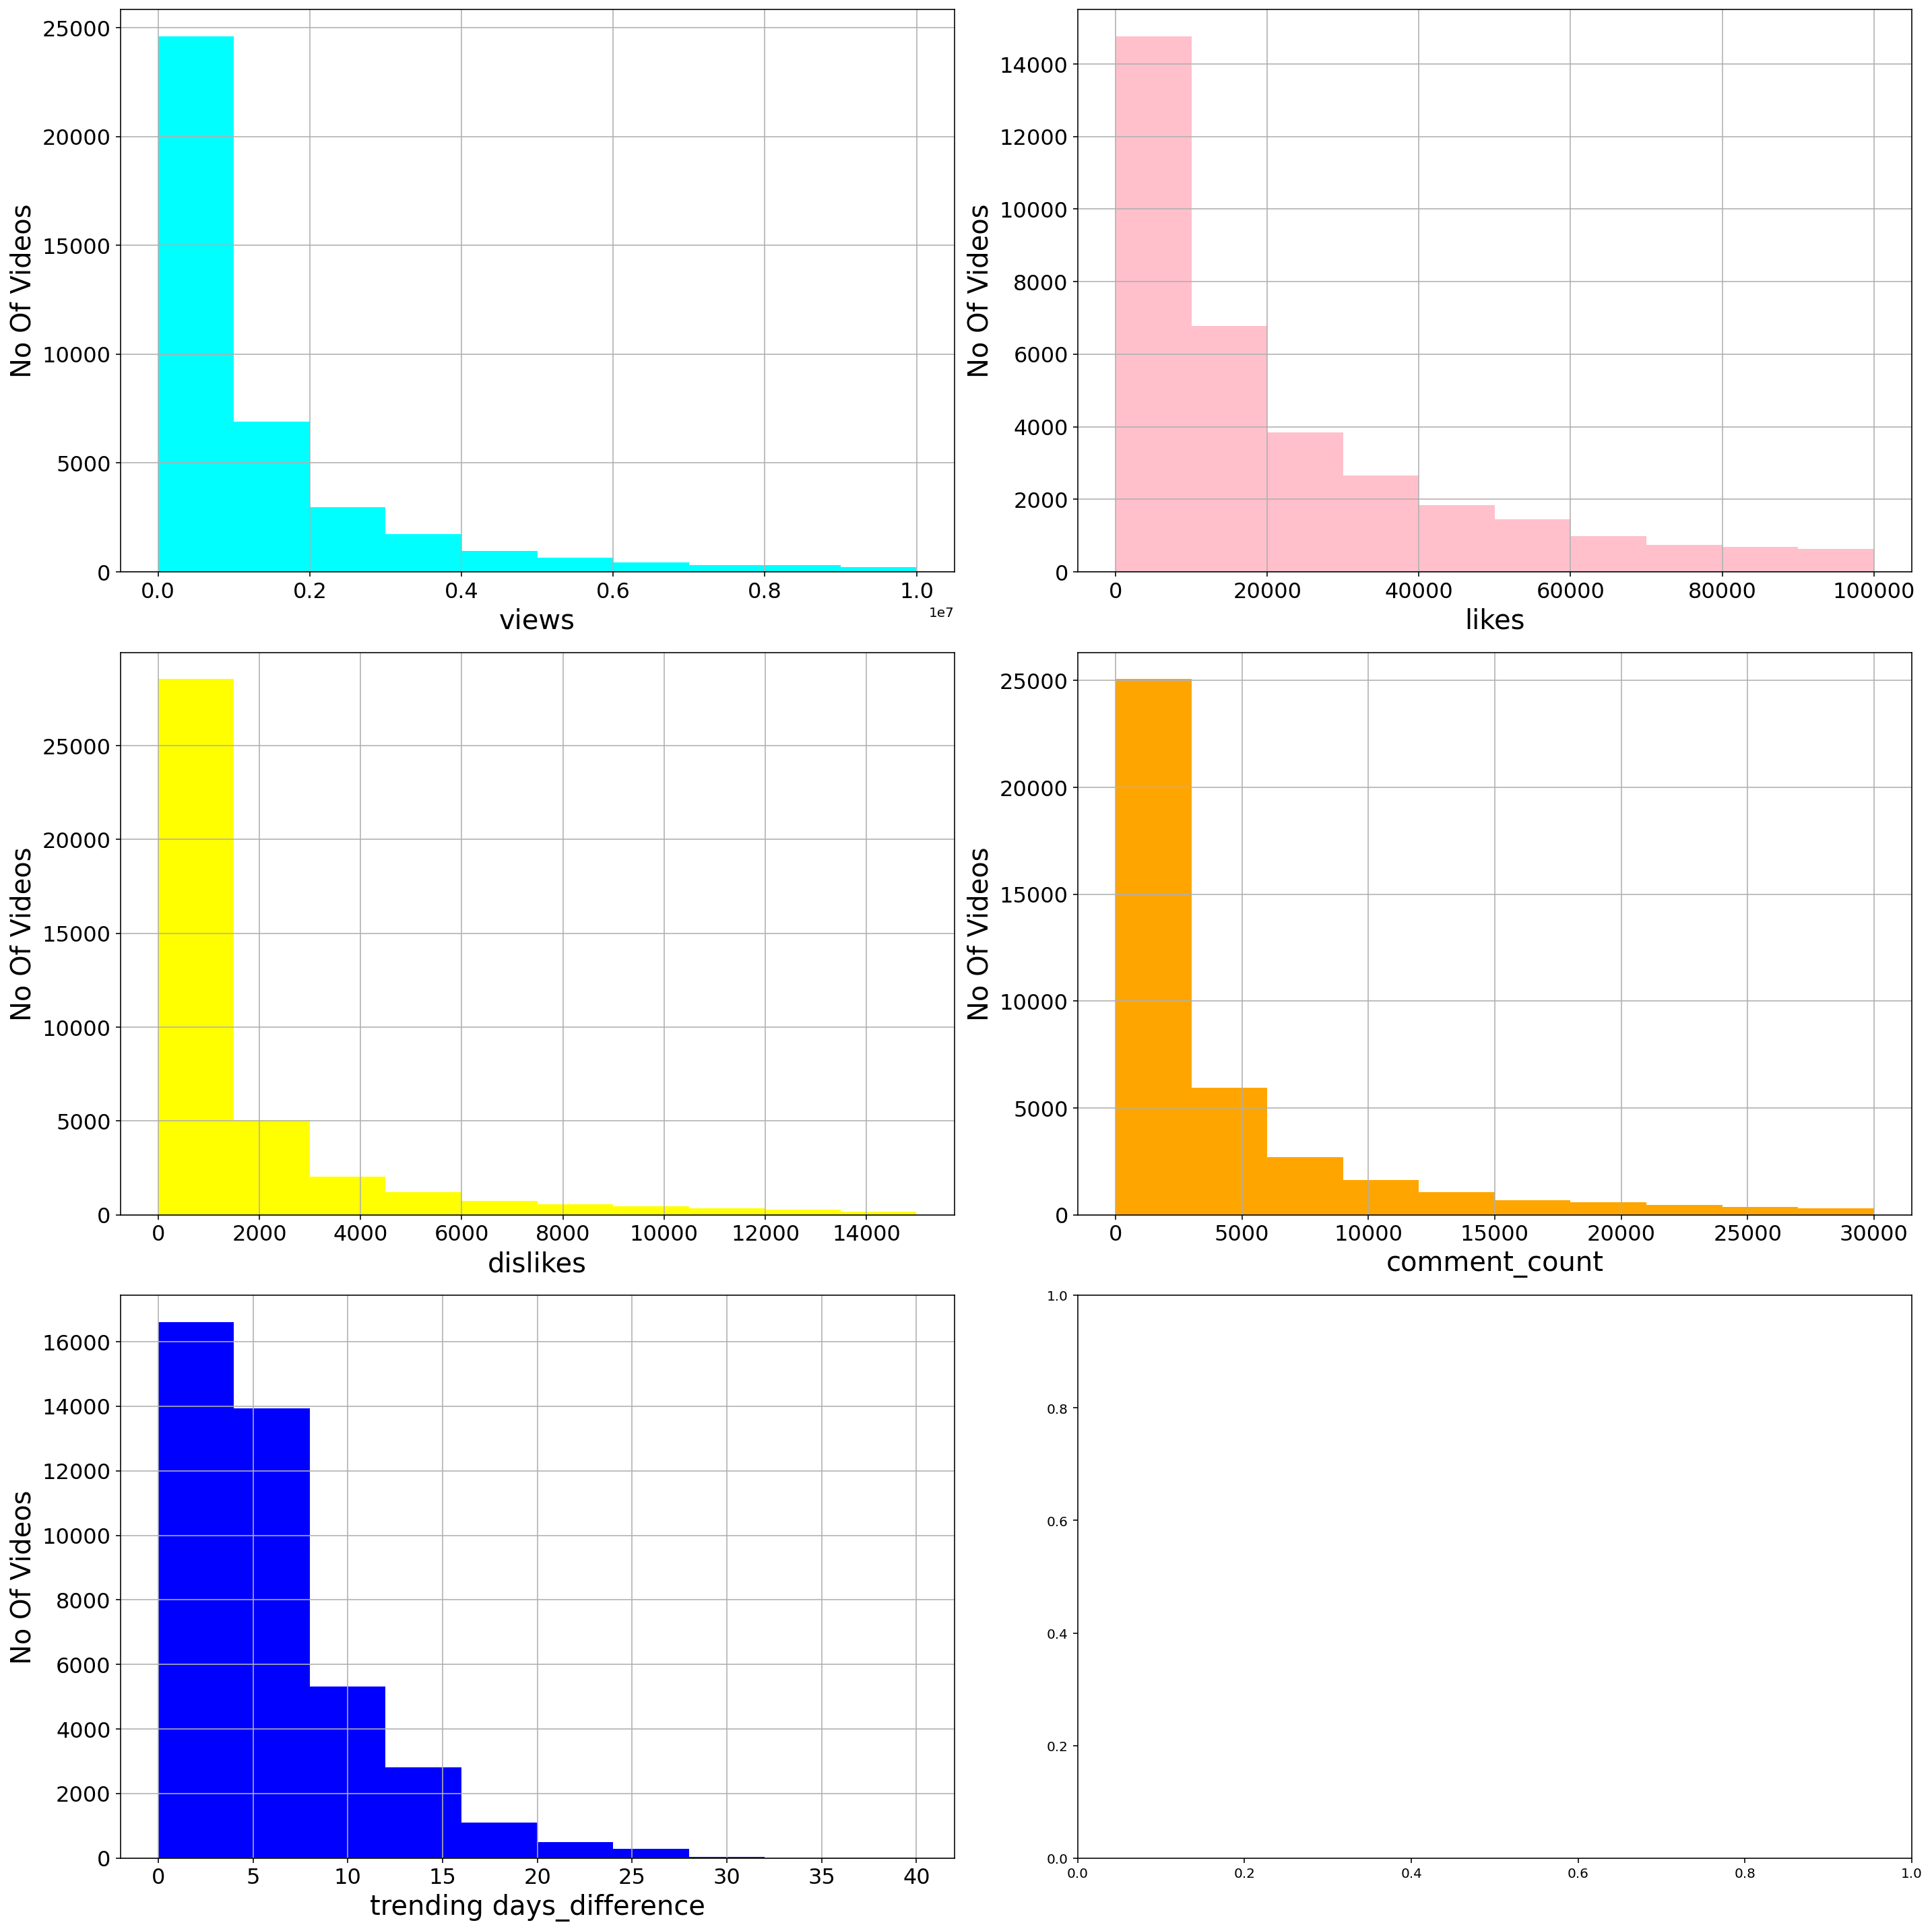

In [22]:
r=[10000000,100000,15000,30000,40]
fig, ax = plt.subplots(3, 2, figsize=(20, 20))
for var,i,j,subplot in zip(numerical,r,color, ax.flatten()):
    ax=df[df[var]<=i][var].hist(ax=subplot,ylabelsize=16,xlabelsize=16,color=j)
    ax.set_xlabel(var,fontsize=20)
    ax.set_ylabel("No Of Videos",fontsize=20)
fig.tight_layout()  

We can infer that majority of the videos that trend have 2 million views or less, 400k or less likes,2000 or less dislikes, 5000 comments or less and 15 or less days were taken for a video to trend

In [23]:
x=[2000000,40000,2000,5000,15]
for i,j in zip(numerical,x):
    c=df[i].loc[df[i]<=j].count()/df[i].count()*100
    print(i,c)

views 76.9811228601431
likes 68.4900730176561
dislikes 75.49879117927178
comment_count 72.26305892695792
trending days_difference 94.40279371901634


We verified our above inference. 77% of our data trended with less than 2 million views, 68% of the videos that trended have 400k or less likes, 75% of the data have 2000 or less dislikes and so on.

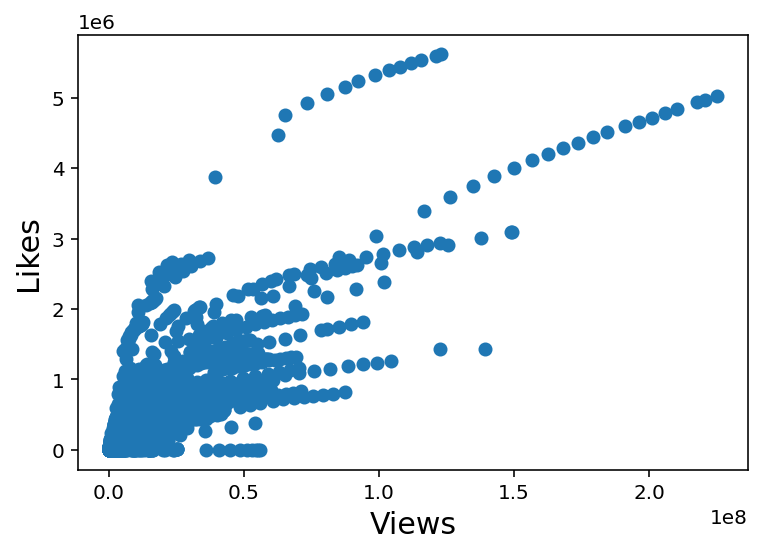

In [24]:
plt.scatter(df['views'],df['likes'])
plt.xlabel("Views",size=15)
plt.ylabel("Likes",size=15)
plt.show()

There is a strong linear relation between the no of views and the no of likes on a video. We see that views and likes are truly positively correlated: as one increases, the other increases too—mostly.

In [25]:
df['category_id'].value_counts()

24    9964
10    6472
26    4146
23    3457
22    3210
25    2487
28    2401
1     2345
17    2174
27    1656
15     920
20     817
19     402
2      384
29      57
43      57
Name: category_id, dtype: int64

# **Reading the json file**

We made a new column 'category_name' containing the coressponding name of the category of the video

In [26]:
df['category_name'] = np.nan
df.loc[(df["category_id"] == 1),"category_name"] = 'Film and Animation'
df.loc[(df["category_id"] == 2),"category_name"] = 'Cars and Vehicles'
df.loc[(df["category_id"] == 10),"category_name"] = 'Music'
df.loc[(df["category_id"] == 15),"category_name"] = 'Pets and Animals'
df.loc[(df["category_id"] == 17),"category_name"] = 'Sport'
df.loc[(df["category_id"] == 19),"category_name"] = 'Travel and Events'
df.loc[(df["category_id"] == 20),"category_name"] = 'Gaming'
df.loc[(df["category_id"] == 22),"category_name"] = 'People and Blogs'
df.loc[(df["category_id"] == 23),"category_name"] = 'Comedy'
df.loc[(df["category_id"] == 24),"category_name"] = 'Entertainment'
df.loc[(df["category_id"] == 25),"category_name"] = 'News and Politics'
df.loc[(df["category_id"] == 26),"category_name"] = 'How to and Style'
df.loc[(df["category_id"] == 27),"category_name"] = 'Education'
df.loc[(df["category_id"] == 28),"category_name"] = 'Science and Technology'
df.loc[(df["category_id"] == 29),"category_name"] = 'Non Profits and Activism'
df.loc[(df["category_id"] == 43),"category_name"] = 'Shows'

Now we can see which categories have the largest number of trending videos

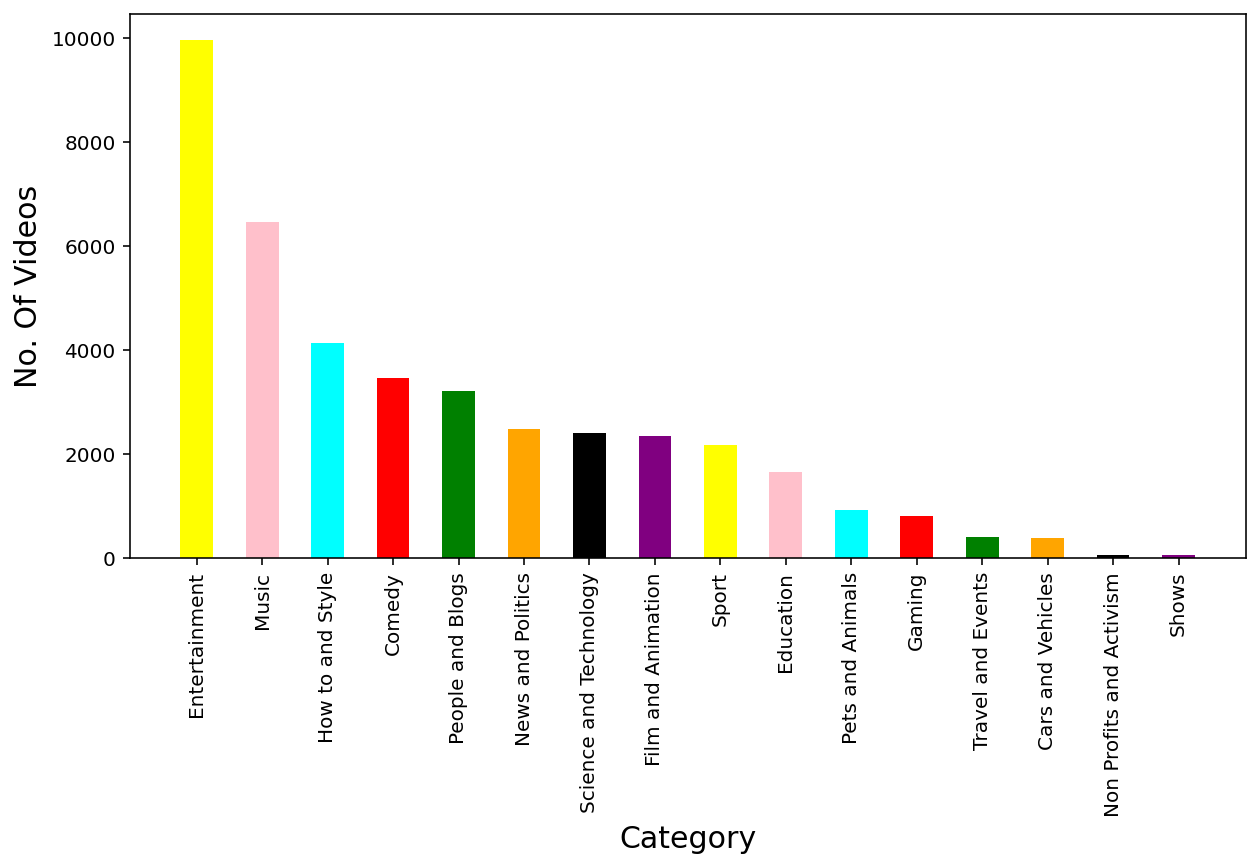

In [27]:
my_dict=(df['category_name'].value_counts()).to_dict()
count= pd.DataFrame(list(my_dict.items()),columns = ['Category','No. Of Videos']) 
fig=plt.figure(figsize=(10,5))
plt.bar(count['Category'],count['No. Of Videos'],color=['yellow', 'pink', 'cyan', 'red', 'green', 'orange', 'black', 'purple'],width=0.5)
plt.xticks(rotation=90)
plt.xlabel("Category",size=15)
plt.ylabel("No. Of Videos",size=15)
plt.show()

We see that the Entertainment category contains the largest number of trending videos with around 10,000 videos, followed by Music category with around 6,200 videos, followed by How to & Style category with around 4,100 videos, and so on.

**Now we will see which category has the maximum likes**

                        category_name    likes
category_id                                   
1                  Film and Animation   922355
2                   Cars and Vehicles    97030
10                              Music  5613827
15                   Pets and Animals   178243
17                              Sport  1121217
19                  Travel and Events    42447
20                             Gaming   444203
22                   People and Blogs  2032463
23                             Comedy   865679
24                      Entertainment  3093544
25                  News and Politics   163338
26                   How to and Style   605954
27                          Education   240989
28             Science and Technology   564804
29           Non Profits and Activism  1988746
43                              Shows    33261


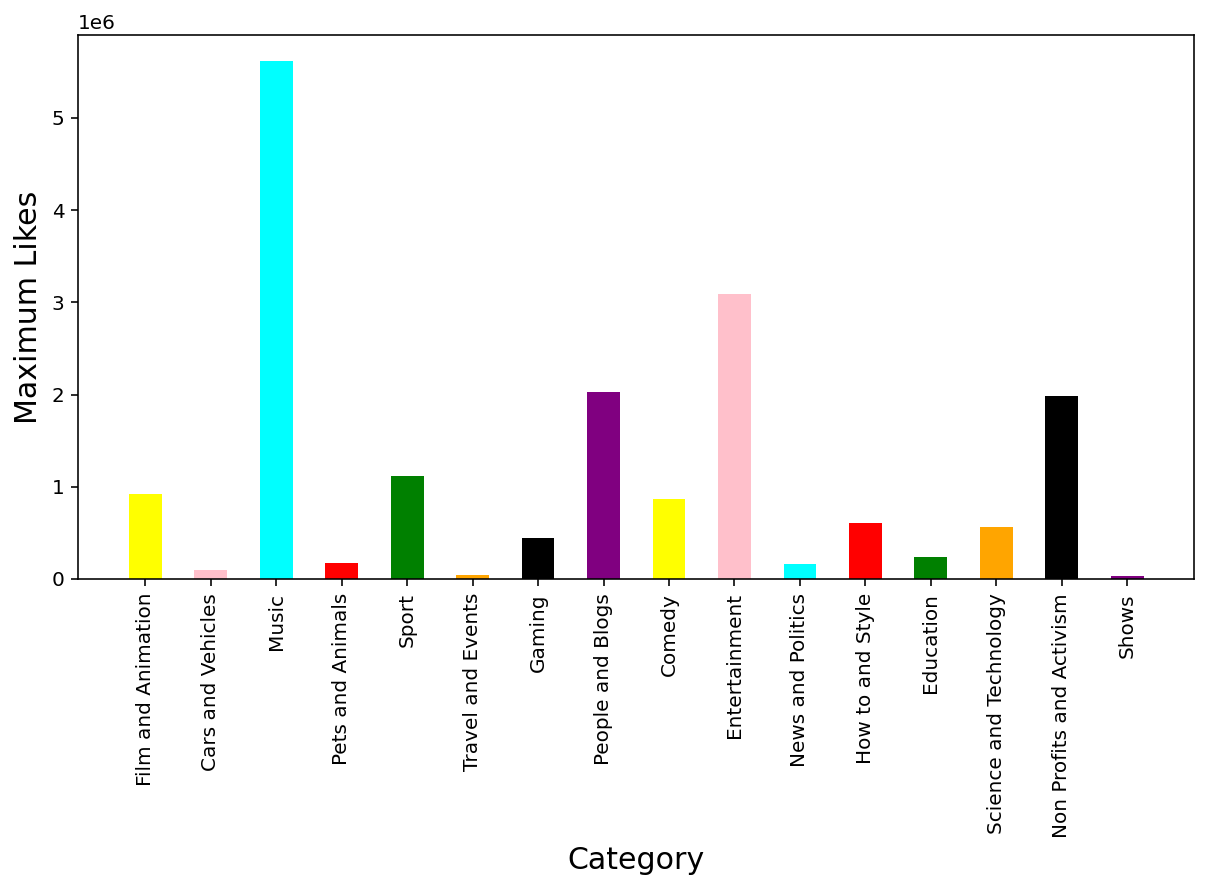

In [28]:
a=df.groupby('category_id')
c=a['category_name','likes'].max()
print(c)
fig=plt.figure(figsize=(10,5))
plt.bar(c['category_name'],c['likes'],color=['yellow', 'pink', 'cyan', 'red', 'green', 'orange', 'black', 'purple'],width=0.5)
plt.xticks(rotation=90)
plt.xlabel("Category",size=15)
plt.ylabel("Maximum Likes",size=15)
plt.show()

Music and entertainment have the most likes

# **Description of non-numerical columns**
After we described numerical columns, we now describe non-numerical columns

In [29]:
df.describe(include="object")

,video_id,title,channel_title,tags,thumbnail_link,description,category_name
count,40949,40949,40949,40949,40949,40949,40949
unique,6351,6455,2207,6055,6352,6902,16
top,j4KvrAUjn6c,WE MADE OUR MOM CRY...HER DREAM CAME TRUE!,ESPN,[none],https://i.ytimg.com/vi/j4KvrAUjn6c/default.jpg,,Entertainment
freq,30,30,203,1535,30,570,9964



There are 6351 unique video IDs, we expect to have 6351 unique video titles also, because we assume that each ID is linked to a corresponding title. One possible interpretation is that a trending video had some title when it appeared on the trending list, then it appeared again on another day but with a modified title. Similar explaination applies for description column as well.

To verify our interpretation for title column, let's take a look at an example where a trending video appeared more than once on the trending list but with different titles

In [30]:
grouped = df.groupby("video_id")
groups = []
wanted_groups = []
for key, item in grouped:
    groups.append(grouped.get_group(key))

for g in groups:
    if len(g['title'].unique()) != 1:
        wanted_groups.append(g)

wanted_groups[0]

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,trending days_difference,category_name
14266,0ufNmUyf2co,2018-01-26,Here are the weirdest bikes I own - Freak Bike...,Seth's Bike Hacks,26,2018-01-25 00:00:04,"bikes|""bicycles""|""weird bikes""|""custom bikes""|...",183149,6969,68,824,https://i.ytimg.com/vi/0ufNmUyf2co/default.jpg,False,False,False,Some of the questions I get most are about my ...,0,How to and Style
14491,0ufNmUyf2co,2018-01-27,Here are the weirdest bikes I own - Freak Bike...,Seth's Bike Hacks,26,2018-01-25 00:00:04,"bikes|""bicycles""|""weird bikes""|""custom bikes""|...",203919,7358,72,746,https://i.ytimg.com/vi/0ufNmUyf2co/default.jpg,False,False,False,Some of the questions I get most are about my ...,1,How to and Style
14706,0ufNmUyf2co,2018-01-28,Bike Check - My freak bikes,Seth's Bike Hacks,26,2018-01-25 00:00:04,"bikes|""bicycles""|""weird bikes""|""custom bikes""|...",216447,7608,74,759,https://i.ytimg.com/vi/0ufNmUyf2co/default.jpg,False,False,False,Some of the questions I get most are about my ...,2,How to and Style
14931,0ufNmUyf2co,2018-01-29,Bike Check - My freak bikes,Seth's Bike Hacks,26,2018-01-25 00:00:04,"bikes|""bicycles""|""weird bikes""|""custom bikes""|...",227005,7754,78,759,https://i.ytimg.com/vi/0ufNmUyf2co/default.jpg,False,False,False,Some of the questions I get most are about my ...,3,How to and Style
15175,0ufNmUyf2co,2018-01-30,Bike Check - My freak bikes,Seth's Bike Hacks,26,2018-01-25 00:00:04,"bikes|""bicycles""|""weird bikes""|""custom bikes""|...",233482,7852,78,769,https://i.ytimg.com/vi/0ufNmUyf2co/default.jpg,False,False,False,Some of the questions I get most are about my ...,4,How to and Style
15385,0ufNmUyf2co,2018-01-31,Bike Check - My freak bikes,Seth's Bike Hacks,26,2018-01-25 00:00:04,"bikes|""bicycles""|""weird bikes""|""custom bikes""|...",238483,7894,81,778,https://i.ytimg.com/vi/0ufNmUyf2co/default.jpg,False,False,False,Some of the questions I get most are about my ...,5,How to and Style


We can see that this video appeared on the list with two different titles.

**How many trending video titles contain capitalized word?**

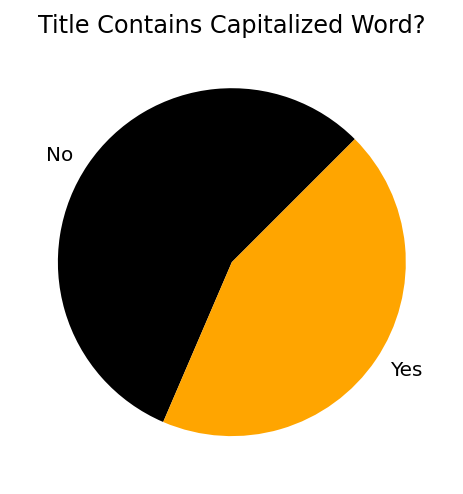

In [31]:
def contains_capitalized_word(s):
    for w in s.split():
        if w.isupper():
            return True
    return False
df["contains_capitalized"] = df["title"].apply(contains_capitalized_word)
value_counts = df["contains_capitalized"].value_counts().to_dict()
plt.pie([value_counts[False], value_counts[True]], labels=['No', 'Yes'], colors=['black', 'orange'],startangle=45)
plt.title('Title Contains Capitalized Word?')
plt.show()

In [32]:
df["contains_capitalized"].value_counts(normalize=True)*100

False   56.04
True    43.96
Name: contains_capitalized, dtype: float64

We can see that 44% of trending video titles contain at least a capitalized word.

# **Video title lengths**

Let's add another column to our dataset to represent the length of each video title, then plot the histogram of title length to get an idea about the lengths of trending video titles

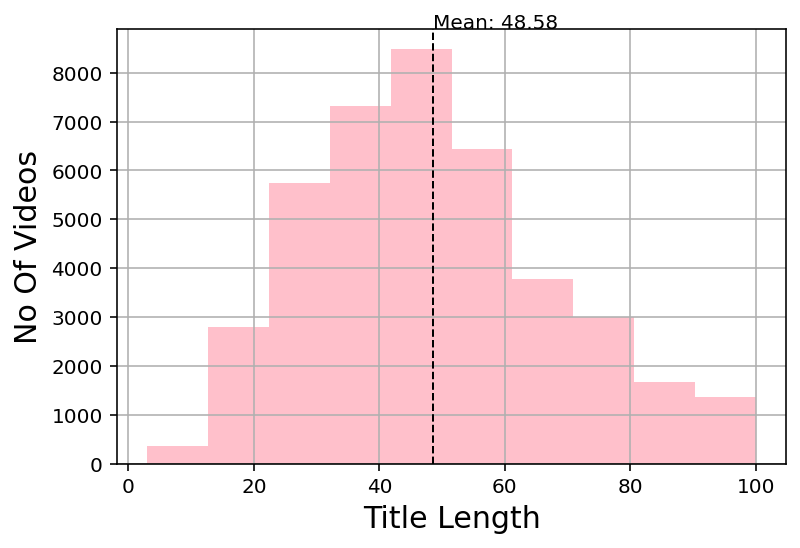

In [33]:
df["title_length"]= df["title"].apply(lambda x: len(x))
ax=df['title_length'].hist(color="pink")
ax.axvline(df['title_length'].mean(), color='k', linestyle='dashed', linewidth=1)
min_ylim, max_ylim = plt.ylim()
ax.text(df['title_length'].mean(), max_ylim, 'Mean: {:.2f}'.format(df['title_length'].mean()))
plt.xlabel("Title Length",fontsize=15)
plt.ylabel("No Of Videos",fontsize=15)
plt.show()

We can see that title-length distribution resembles a normal distribution, where most videos have title lengths between 30 and 60 character approximately.

Now let's draw a scatter plot between title length and number of views to see the relationship between these two variables

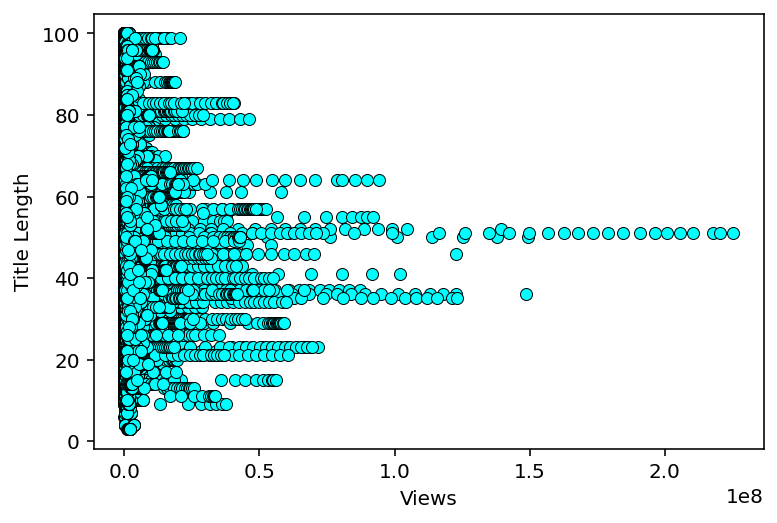

In [34]:
fig, ax = plt.subplots()
_ = ax.scatter(x=df['views'], y=df['title_length'], color='cyan', edgecolors="#000000", linewidths=0.5)
_ = ax.set(xlabel="Views", ylabel="Title Length")

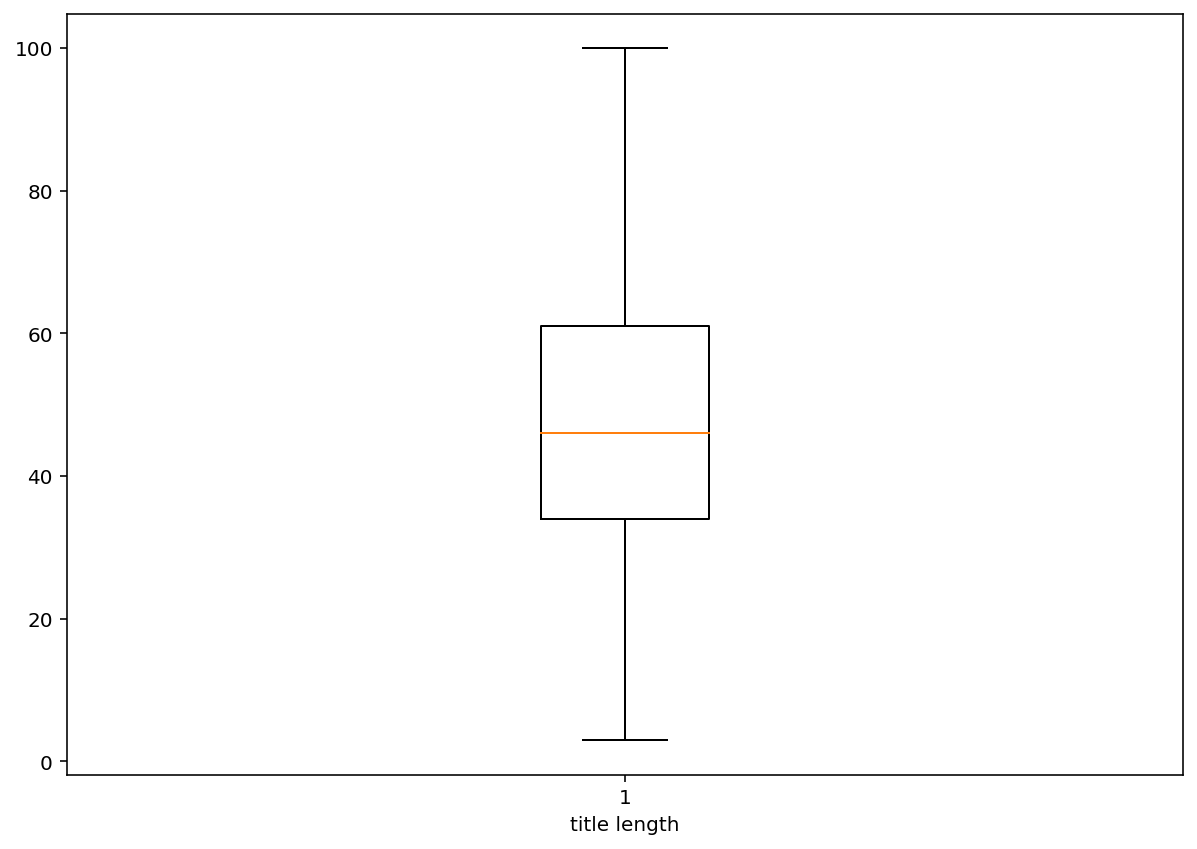

In [35]:
fig = plt.figure(figsize =(10, 7))
plt.boxplot(df.title_length)
plt.xlabel("title length")
plt.show()

Now let's draw a scatter plot between title length and number of likes to see the relationship between these two variables

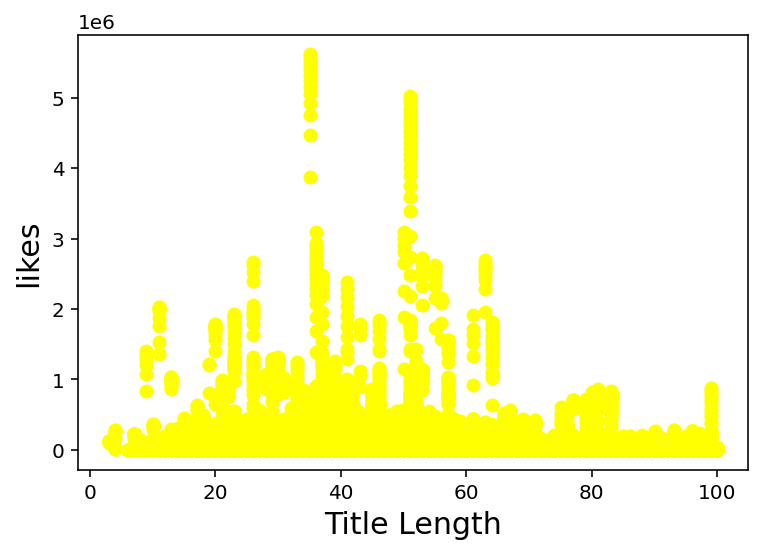

In [36]:
plt.scatter(df['title_length'],df['likes'],color="yellow")
plt.xlabel("Title Length",size=15)
plt.ylabel("likes",size=15)
plt.show()

By looking at the scatter plot, we can say that there is no relationship between the title length and the number of likes.

**Most common words in video titles**

In [37]:
title_words = list(df["title"].apply(lambda x: x.split()))
title_words = [x for y in title_words for x in y]
Counter(title_words).most_common(25)

[('-', 11452),
 ('|', 10663),
 ('The', 5762),
 ('the', 3610),
 ('a', 2566),
 ('to', 2343),
 ('of', 2338),
 ('in', 2176),
 ('A', 2122),
 ('&', 2024),
 ('I', 1940),
 ('and', 1917),
 ('Video)', 1901),
 ('Trailer', 1868),
 ('How', 1661),
 ('with', 1655),
 ('2018', 1613),
 ('(Official', 1594),
 ('Official', 1554),
 ('on', 1552),
 ('To', 1397),
 ('You', 1254),
 ('My', 1080),
 ('for', 1020),
 ('ft.', 1017)]

Ignoring words like "the" and "of", we can see that "-" and "|" symbols occured a lot in the 40949 trending video titles: 11452 times and 10663 times respectively. We notice also that words "Video", "Trailer", "How", and "2018" are common in trending video titles; each occured in 1613-1901 video titles.

Let's draw a word cloud for the titles of our trending videos, which is a way to visualize most common words in the titles; the more common the word is, the bigger its font size is

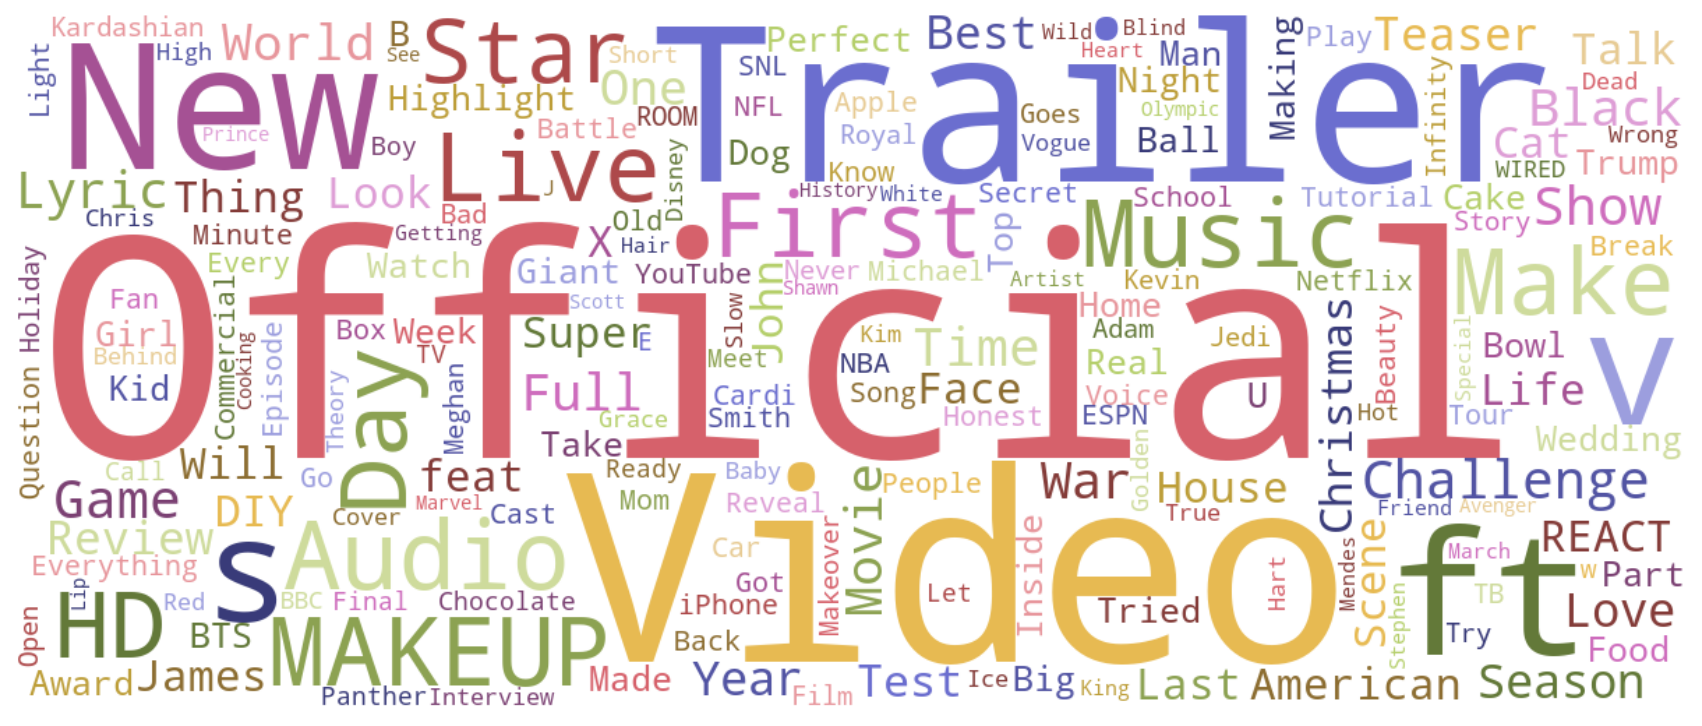

In [38]:
wc = wordcloud.WordCloud(width=1200, height=500, 
                         collocations=False, background_color="white", 
                         colormap="tab20b").generate(" ".join(title_words))
plt.figure(figsize=(15,10))
plt.imshow(wc, interpolation='bilinear')
_ = plt.axis("off")

Which channels have the largest number of trending videos?

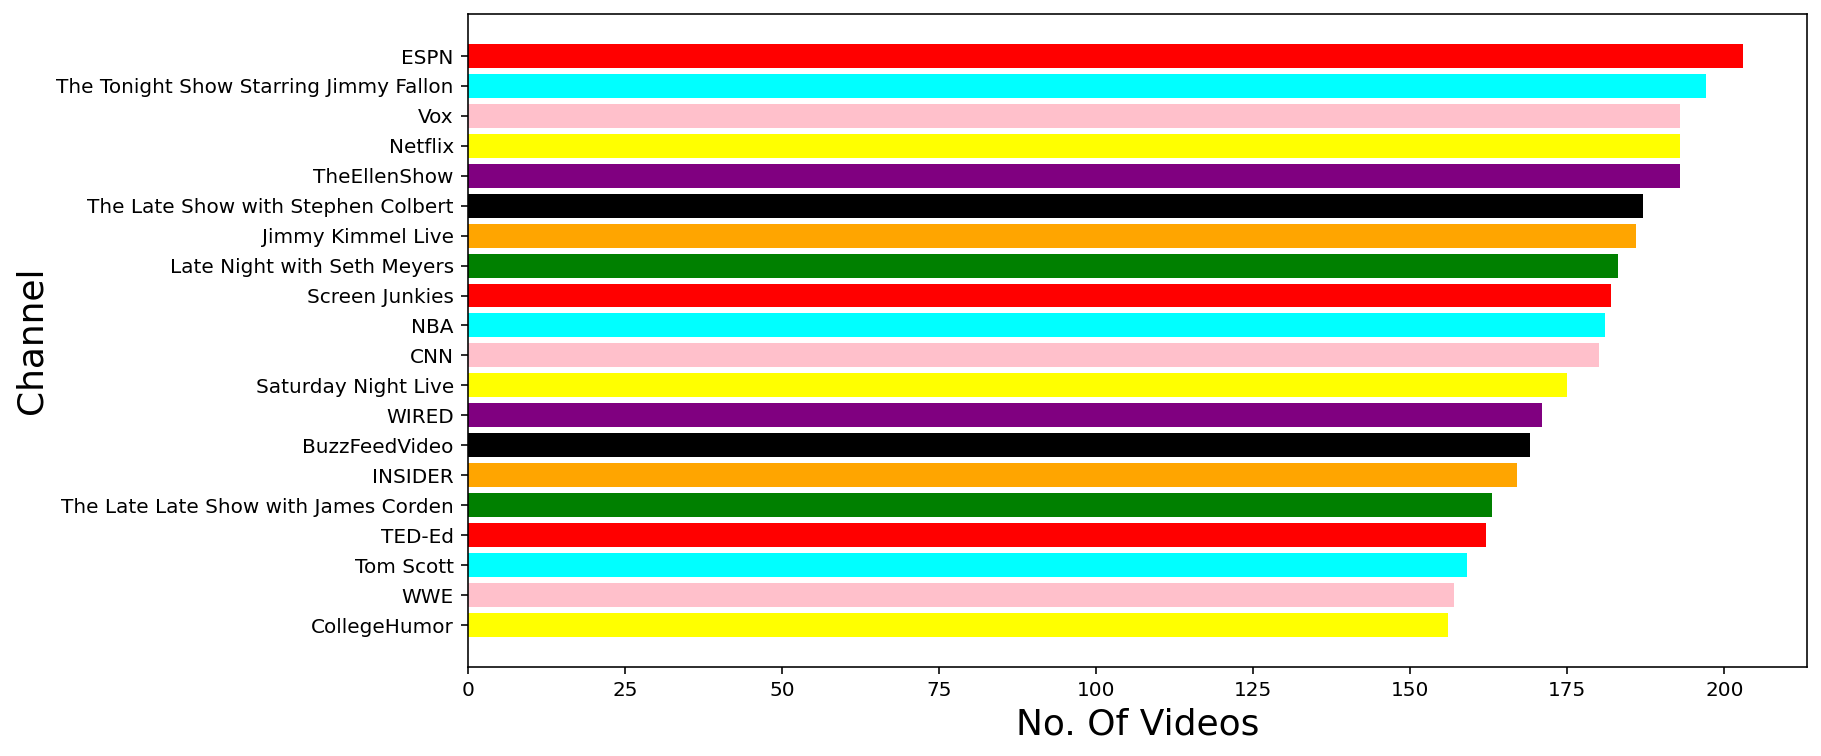

In [39]:
cdf = df.groupby("channel_title").size().reset_index(name="video_count").sort_values("video_count", ascending=False).head(20)
cdf_sorted= cdf.sort_values('video_count')
fig=plt.figure(figsize=(12,6))
plt.barh(cdf_sorted['channel_title'],cdf_sorted['video_count'],color=['yellow', 'pink', 'cyan', 'red', 'green', 'orange', 'black', 'purple'])
plt.xlabel("No. Of Videos",size=18)
plt.ylabel("Channel",size=18)
plt.show()

How many trending videos have an error?

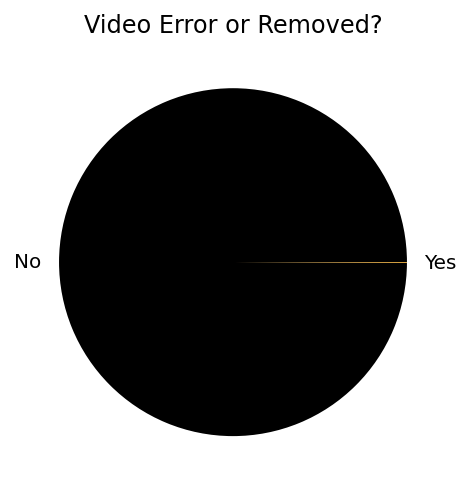

In [40]:
value_counts = df["video_error_or_removed"].value_counts().to_dict()
plt.pie([value_counts[False], value_counts[True]], labels=['No', 'Yes'], colors=['black', 'orange'])
plt.title('Video Error or Removed?')
plt.show()

In [41]:
df["video_error_or_removed"].value_counts()

False    40926
True        23
Name: video_error_or_removed, dtype: int64

How many trending videos have their comments disabled?

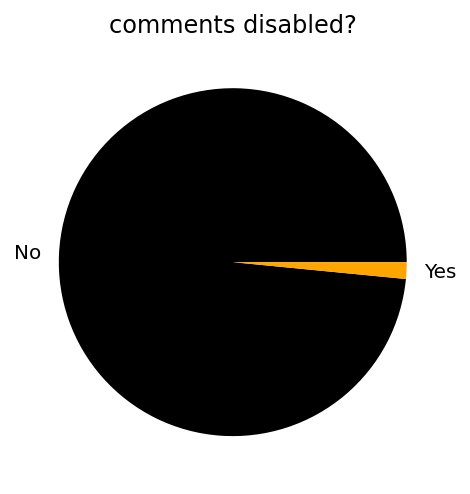

In [42]:
value_counts = df["comments_disabled"].value_counts().to_dict()
plt.pie([value_counts[False], value_counts[True]], labels=['No', 'Yes'], colors=['black', 'orange'])
plt.title('comments disabled?')
plt.show()

How many trending videos have their ratings disabled?

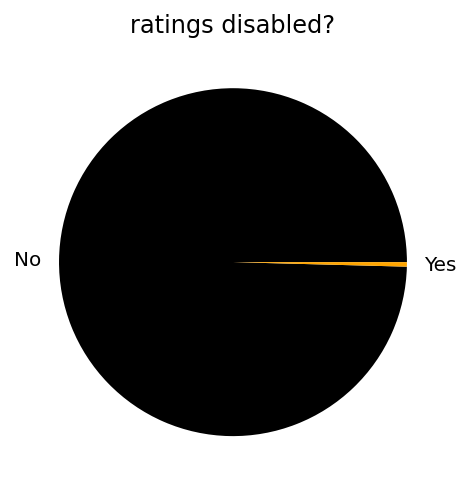

In [43]:
value_counts = df["ratings_disabled"].value_counts().to_dict()
plt.pie([value_counts[False], value_counts[True]], labels=['No', 'Yes'], colors=['black', 'orange'])
plt.title('ratings disabled?')
plt.show()

How many videos have both comments and ratings disabled?

In [44]:
len(df[(df["comments_disabled"] == True) & (df["ratings_disabled"] == True)].index)

106

# **Correlation between dataset variables**

Now let's see how the dataset variables are correlated with each other: for example, we would like to see how views and likes are correlated, meaning do views and likes increase and decrease together (positive correlation)? Does one of them increase when the other decrease and vice versa (negative correlation)? Or are they not correlated?

Correlation is represented as a value between -1 and +1 where +1 denotes the highest positive correlation, -1 denotes the highest negative correlation, and 0 denotes that there is no correlation.

In [45]:
df.corr()

,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,trending days_difference,contains_capitalized,title_length
category_id,1.00,-0.17,-0.17,-0.03,-0.08,0.05,-0.01,-0.03,-0.03,0.06,0.02
views,-0.17,1.00,0.85,0.47,0.62,0.00,0.02,-0.00,-0.01,-0.03,-0.04
likes,-0.17,0.85,1.00,0.45,0.80,-0.03,-0.02,-0.00,-0.02,-0.00,-0.08
dislikes,-0.03,0.47,0.45,1.00,0.70,-0.00,-0.01,-0.00,-0.01,-0.02,-0.03
comment_count,-0.08,0.62,0.80,0.70,1.00,-0.03,-0.01,-0.00,-0.01,0.02,-0.07
comments_disabled,0.05,0.00,-0.03,-0.00,-0.03,1.00,0.32,-0.00,-0.00,0.01,0.03
ratings_disabled,-0.01,0.02,-0.02,-0.01,-0.01,0.32,1.00,-0.00,0.00,0.00,0.00
video_error_or_removed,-0.03,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,1.00,-0.00,-0.02,-0.01
trending days_difference,-0.03,-0.01,-0.02,-0.01,-0.01,-0.00,0.00,-0.00,1.00,-0.01,-0.05
contains_capitalized,0.06,-0.03,-0.00,-0.02,0.02,0.01,0.00,-0.02,-0.01,1.00,0.13


Now let's visualize the correlation table above using a heatmap

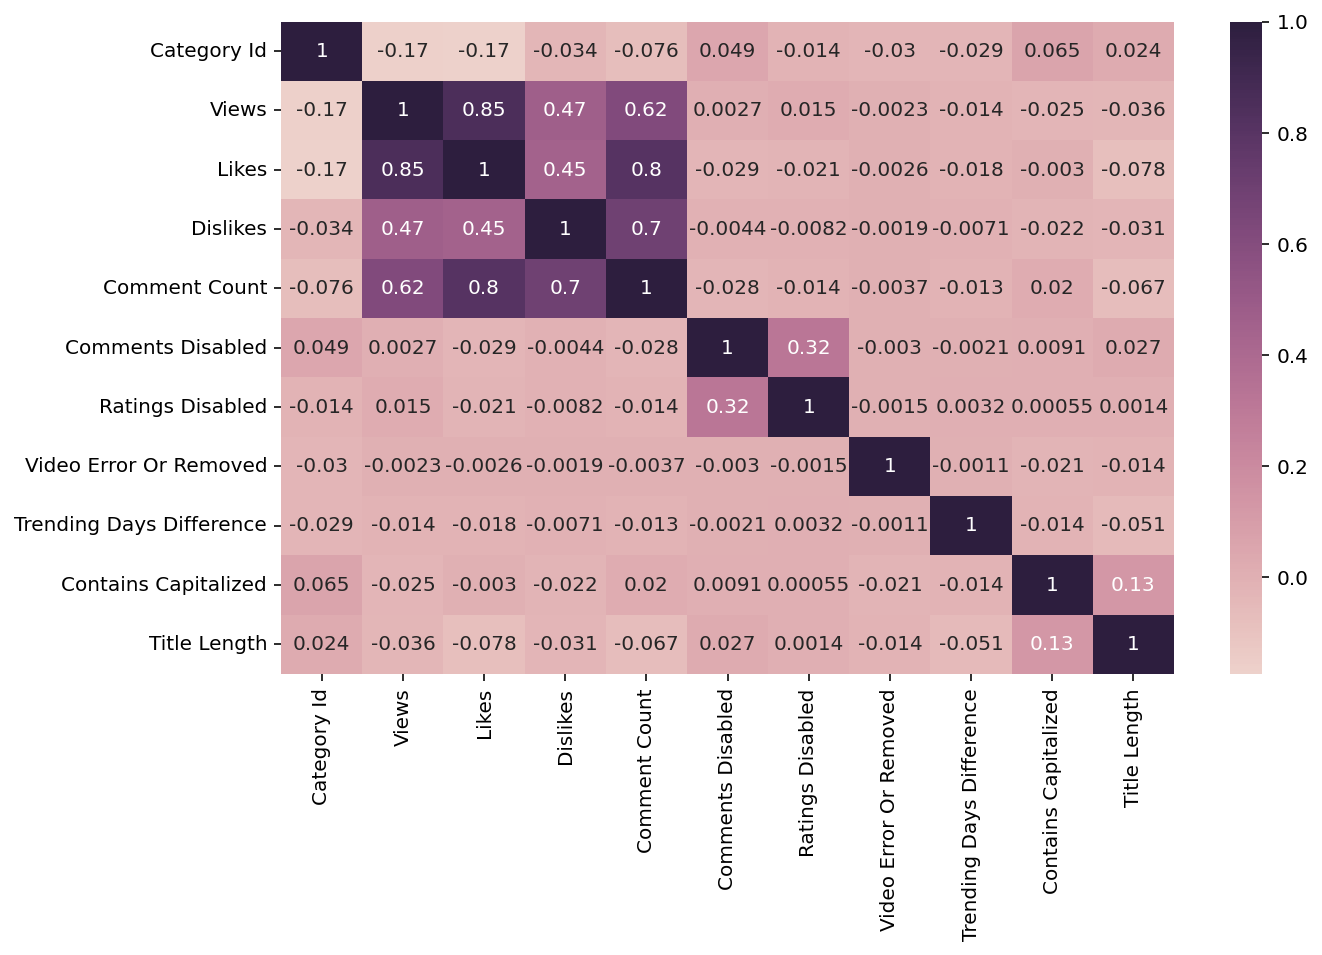

In [46]:
h_labels = [x.replace('_', ' ').title() for x in 
            list(df.select_dtypes(include=['number', 'bool']).columns.values)]

fig, ax = plt.subplots(figsize=(10,6))
_ = sns.heatmap(df.corr(), annot=True, xticklabels=h_labels, yticklabels=h_labels, cmap=sns.cubehelix_palette(as_cmap=True), ax=ax)

The correlation map and correlation table above say that views and likes are highly positively correlated. Let's verify that by plotting a scatter plot between views and likes to visualize the relationship between these variables

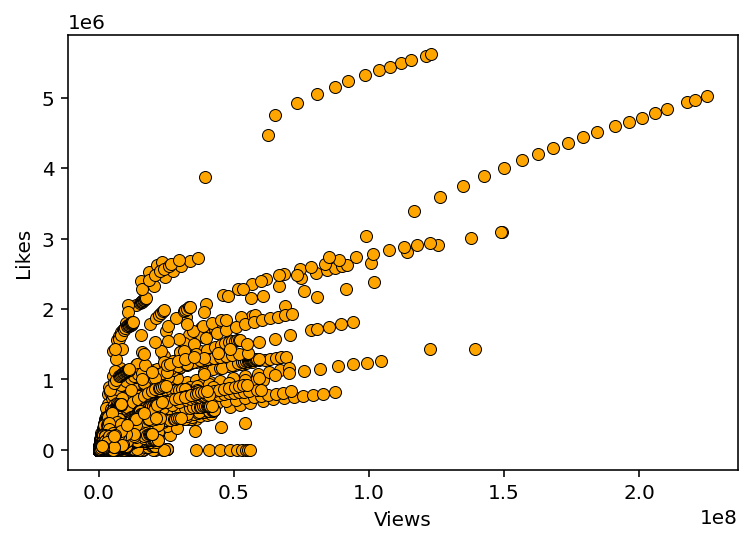

In [47]:
fig, ax = plt.subplots()
_ = plt.scatter(x=df['views'], y=df['likes'], color='orange', edgecolors="#000000", linewidths=0.5)
_ = ax.set(xlabel="Views", ylabel="Likes")

We see that views and likes are truly positively correlated: as one increases, the other increases too—mostly.

Another verification of the correlation matrix and map is the scatter plot we drew above between views and title length as it shows that there is no correlation between them.

**Looking if Views, likes, dislikes and comment counts have a normal distribuition**

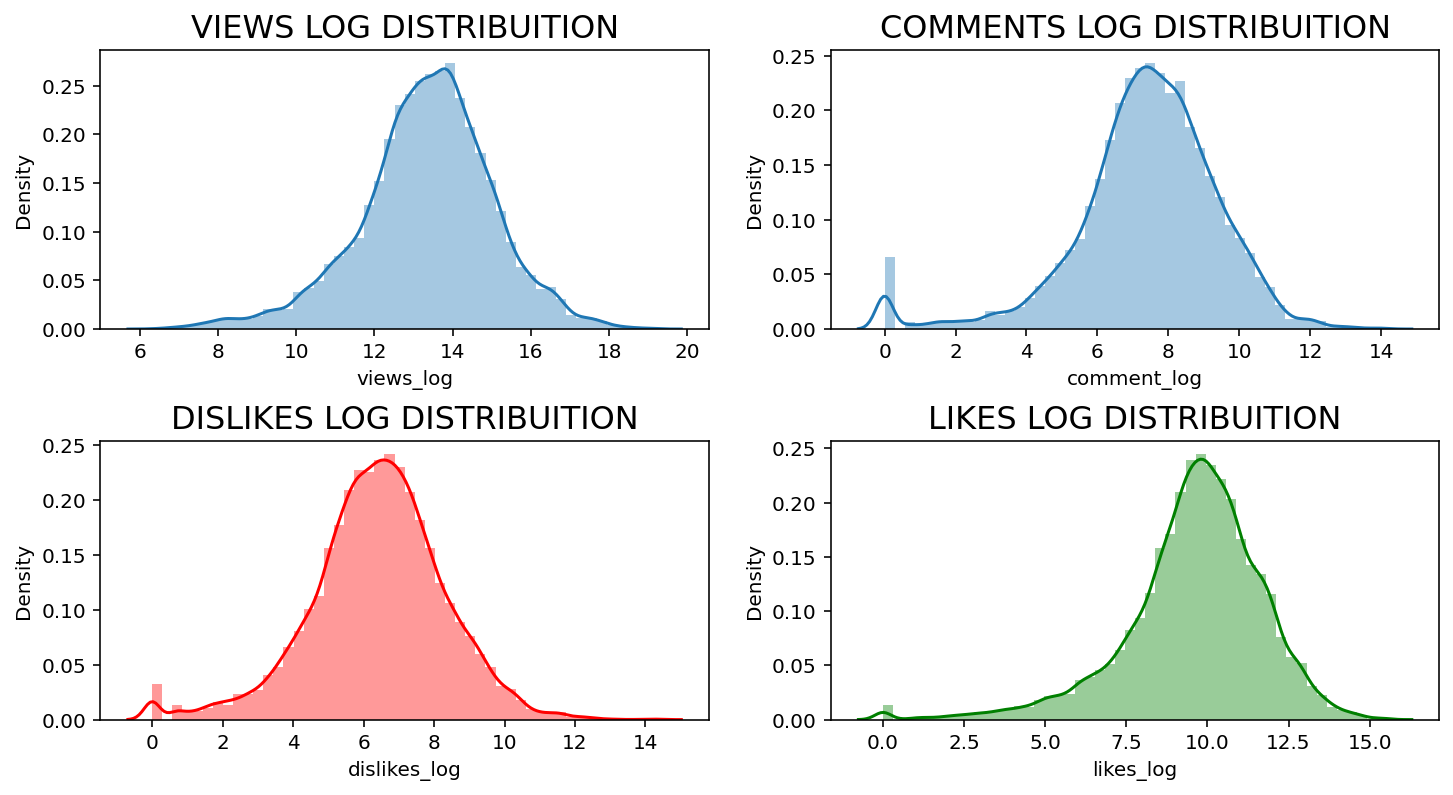

In [48]:
df['likes_log'] = np.log(df['likes'] + 1)
df['views_log'] = np.log(df['views'] + 1)
df['dislikes_log'] = np.log(df['dislikes'] + 1)
df['comment_log'] = np.log(df['comment_count'] + 1)

plt.figure(figsize = (12,6))

plt.subplot(221)
g1 = sns.distplot(df['views_log'])
g1.set_title("VIEWS LOG DISTRIBUITION", fontsize=16)

plt.subplot(224)
g2 = sns.distplot(df['likes_log'],color='green')
g2.set_title('LIKES LOG DISTRIBUITION', fontsize=16)

plt.subplot(223)
g3 = sns.distplot(df['dislikes_log'], color='r')
g3.set_title("DISLIKES LOG DISTRIBUITION", fontsize=16)

plt.subplot(222)
g4 = sns.distplot(df['comment_log'])
g4.set_title("COMMENTS LOG DISTRIBUITION", fontsize=16)

plt.subplots_adjust(wspace = 0.2, hspace = 0.4,top = 0.9)

plt.show()

**Looking at the Views, likes, dislikes distribuition by category_name's**

Category Name count
Entertainment       9964
Music               6472
How to and Style    4146
Comedy              3457
People and Blogs    3210
Name: category_name, dtype: int64


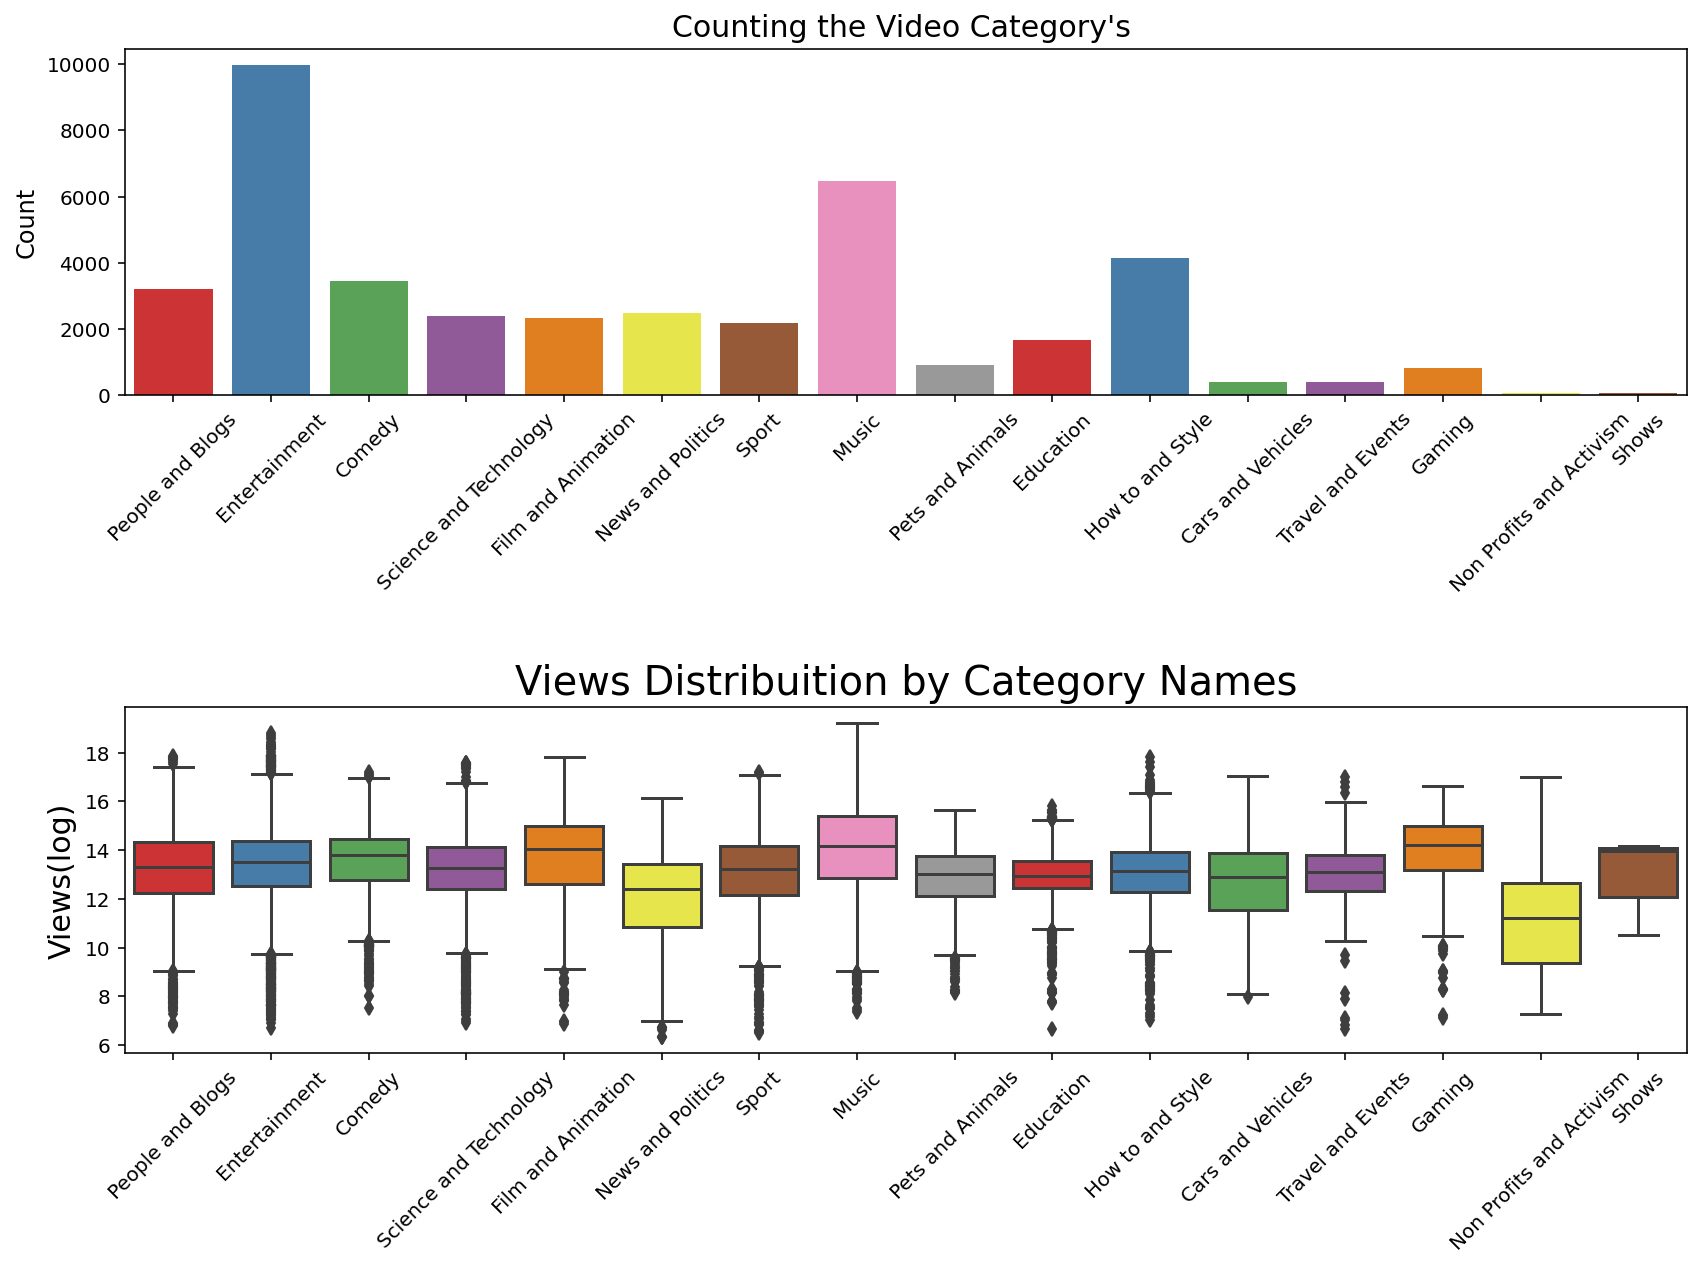

In [49]:
print("Category Name count")
print(df.category_name.value_counts()[:5])

plt.figure(figsize = (14,9))

plt.subplot(211)
g = sns.countplot('category_name', data=df, palette="Set1")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Counting the Video Category's ", fontsize=15)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Count", fontsize=12)

plt.subplot(212)
g1 = sns.boxplot(x='category_name', y='views_log', data=df, palette="Set1")
g1.set_xticklabels(g.get_xticklabels(),rotation=45)
g1.set_title("Views Distribuition by Category Names", fontsize=20)
g1.set_xlabel("", fontsize=15)
g1.set_ylabel("Views(log)", fontsize=15)

plt.subplots_adjust(hspace = 0.9, top = 0.9)

plt.show()

Significant number of politics and news videos.

The unique difference is in Non Profits and Activism videos that have less views than the "normal" videos

# Conclusion

* We analyzed a dataset that contains information about YouTube trending videos for 205 days. The dataset was collected in 2017 and 2018. It contains 40949 video entry.
* 71% of trending videos have less than 1.5 million views, and 91% have less than 5 million views.
* 68% of trending videos have less than 40,000 likes, and 84% have less than 100,000 likes.
* 67% of trending videos have less than 4,000 comments, and 93% have less than 25,000 comments.
Some videos may appear on the trending videos list on more than one day. Our dataset contains 40494 entries but not for 40494 unique videos but for 6351unique videos.
* Trending videos that have 100,000,000 views and more have title length between 33 and 55 characters approximately.
* The delimiters - and | were common in trending video titles.
* The words 'Official', 'Video', 'Trailer', 'How', and '2018' were common also in trending video titles.
* There is a strong positive correlation between the number of views and the number of likes of trending videos: As one of them increases, the other increases, and vice versa.
* There is a strong positive correlation also between the number of likes and the number of comments, and a slightly weaker one between the number of dislikes and the number of comments.
* The category that has the largest number of trending videos is 'Entertainment' with 9,964 videos, followed by 'Music' category with 6,472 videos, followed by 'Howto & Style' category with 4146 videos.
* On the opposite side, the category that has the smallest number of trending videos is 'Shows' with 57 videos, followed by 'Nonprofits & Activisim' with 57 videos, followed by 'Autos & Vehicles' with 384 videos.

<Figure size 1080x720 with 0 Axes>

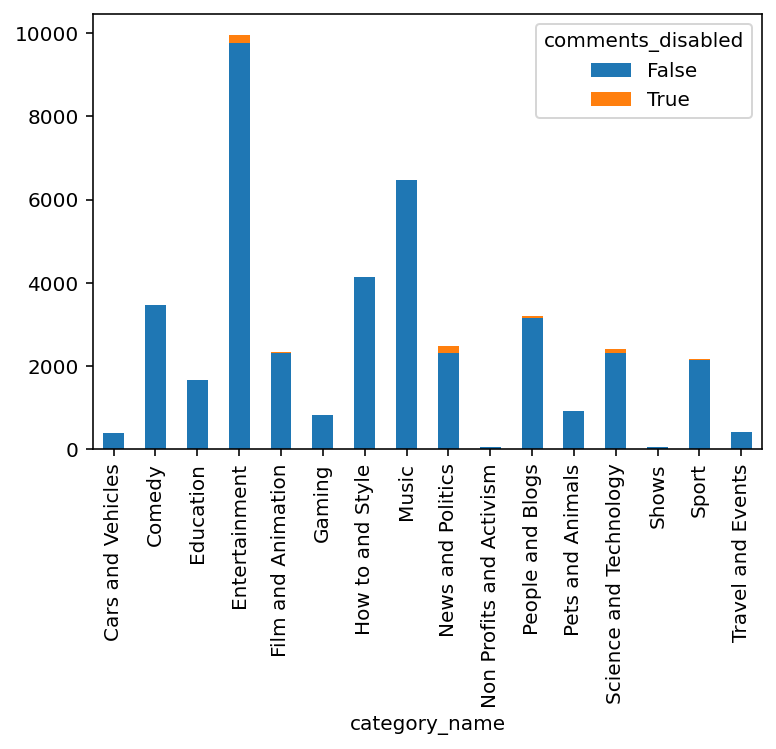

In [50]:
fig=plt.figure(figsize=(15,10))
df2 = df.groupby(['comments_disabled', 'category_name'])['category_name'].count().unstack('comments_disabled').fillna(0)
df2.plot(kind='bar', stacked=True)

plt.show()

In [51]:
df

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,video_error_or_removed,description,trending days_difference,category_name,contains_capitalized,title_length,likes_log,views_log,dislikes_log,comment_log
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13 17:13:01,SHANtell martin,748374,57527,2966,...,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,0,People and Blogs,True,34,10.96,13.53,8.00,9.68
1,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13 07:30:00,"last week tonight trump presidency|""last week ...",2418783,97185,6146,...,False,"One year after the presidential election, John...",0,Entertainment,True,62,11.48,14.70,8.72,9.45
2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12 19:05:24,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,...,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,1,Comedy,False,53,11.89,14.98,8.58,9.01
3,puqaWrEC7tY,2017-11-14,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13 11:00:04,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,...,False,Today we find out if Link is a Nickelback amat...,0,Entertainment,False,32,9.23,12.75,6.50,7.67
4,d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12 18:01:41,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,...,False,I know it's been a while since we did this sho...,1,Entertainment,True,24,11.79,14.56,7.60,9.77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40944,BZt0qjTWNhw,2018-06-14,The Cat Who Caught the Laser,AaronsAnimals,15,2018-05-18 13:00:04,"aarons animals|""aarons""|""animals""|""cat""|""cats""...",1685609,38160,1385,...,False,The Cat Who Caught the Laser - Aaron's Animals,26,Pets and Animals,False,28,10.55,14.34,7.23,7.89
40945,1h7KV2sjUWY,2018-06-14,True Facts : Ant Mutualism,zefrank1,22,2018-05-18 01:00:06,[none],1064798,60008,382,...,False,,26,People and Blogs,False,26,11.00,13.88,5.95,8.28
40946,D6Oy4LfoqsU,2018-06-14,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,Brad Mondo,24,2018-05-18 17:34:22,I gave safiya nygaard a perfect hair makeover ...,1066451,48068,1032,...,False,I had so much fun transforming Safiyas hair in...,26,Entertainment,True,84,10.78,13.88,6.94,8.29
40947,oV0zkMe1K8s,2018-06-14,How Black Panther Should Have Ended,How It Should Have Ended,1,2018-05-17 17:00:04,"Black Panther|""HISHE""|""Marvel""|""Infinity War""|...",5660813,192957,2846,...,False,How Black Panther Should Have EndedWatch More ...,27,Film and Animation,False,35,12.17,15.55,7.95,9.48


In [52]:
c=df.channel_title.value_counts()
c=c[c>50]
c

ESPN                                      203
The Tonight Show Starring Jimmy Fallon    197
TheEllenShow                              193
Vox                                       193
Netflix                                   193
                                         ... 
Lip Sync Battle                            52
Epicurious                                 52
Jaiden Animations                          51
Casey Holmes                               51
CBS Los Angeles                            51
Name: channel_title, Length: 203, dtype: int64

In [53]:
titles=list(c.index)
titles

['ESPN',
 'The Tonight Show Starring Jimmy Fallon',
 'TheEllenShow',
 'Vox',
 'Netflix',
 'The Late Show with Stephen Colbert',
 'Jimmy Kimmel Live',
 'Late Night with Seth Meyers',
 'Screen Junkies',
 'NBA',
 'CNN',
 'Saturday Night Live',
 'WIRED',
 'BuzzFeedVideo',
 'INSIDER',
 'The Late Late Show with James Corden',
 'TED-Ed',
 'Tom Scott',
 'WWE',
 'CollegeHumor',
 'HellthyJunkFood',
 'First We Feast',
 'Tasty',
 'Bon Appétit',
 'Warner Bros. Pictures',
 'FBE',
 'Life Noggin',
 'jacksfilms',
 'The King of Random',
 'Good Mythical Morning',
 'Vanity Fair',
 'Vogue',
 'Safiya Nygaard',
 'SciShow',
 '20th Century Fox',
 'Smosh',
 'Dude Perfect',
 'Marques Brownlee',
 'Great Big Story',
 'Marvel Entertainment',
 'AsapSCIENCE',
 'ABC News',
 'NFL',
 'The Slow Mo Guys',
 'The Voice',
 'James Charles',
 "Simon's Cat",
 'Washington Post',
 'Kurzgesagt – In a Nutshell',
 'CrazyRussianHacker',
 'Binging with Babish',
 'Complex',
 'NikkieTutorials',
 'E! Entertainment',
 'You Suck At Cooking

In [54]:
data=df[df['channel_title'].isin(titles)]
data=data.reset_index()
data.drop(['index','video_id','trending_date','title','category_id','tags','thumbnail_link','description','publish_time'],axis=1,inplace=True)
data

,channel_title,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,trending days_difference,category_name,contains_capitalized,title_length,likes_log,views_log,dislikes_log,comment_log
0,CaseyNeistat,748374,57527,2966,15954,False,False,False,0,People and Blogs,True,34,10.96,13.53,8.00,9.68
1,Rudy Mancuso,3191434,146033,5339,8181,False,False,False,1,Comedy,False,53,11.89,14.98,8.58,9.01
2,Good Mythical Morning,343168,10172,666,2146,False,False,False,0,Entertainment,False,32,9.23,12.75,6.50,7.67
3,nigahiga,2095731,132235,1989,17518,False,False,False,1,Entertainment,True,24,11.79,14.56,7.60,9.77
4,iJustine,119180,9763,511,1434,False,False,False,0,Science and Technology,True,21,9.19,11.69,6.24,7.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18799,Saturday Night Live,8607264,66559,14179,8382,False,False,False,24,Entertainment,True,19,11.11,15.97,9.56,9.03
18800,Lucas the Spider,8300584,266267,4237,14617,False,False,False,25,Film and Animation,False,31,12.49,15.93,8.35,9.59
18801,The Graham Norton Show,5564576,46351,2295,2861,False,False,False,26,Entertainment,True,77,10.74,15.53,7.74,7.96
18802,BuzzFeed Celeb,8259128,645888,4052,62610,False,False,False,26,People and Blogs,True,52,13.38,15.93,8.31,11.04


In [55]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in data.columns:
    if i in ['channel_title','comments_disabled','ratings_disabled','video_error_or_removed','category_name',
           'contains_capitalized']:
        data[i] = le.fit_transform(data[i])
data


,channel_title,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,trending days_difference,category_name,contains_capitalized,title_length,likes_log,views_log,dislikes_log,comment_log
0,32,748374,57527,2966,15954,0,0,0,0,10,1,34,10.96,13.53,8.00,9.68
1,130,3191434,146033,5339,8181,0,0,0,1,1,0,53,11.89,14.98,8.58,9.01
2,60,343168,10172,666,2146,0,0,0,0,3,0,32,9.23,12.75,6.50,7.67
3,201,2095731,132235,1989,17518,0,0,0,1,3,1,24,11.79,14.56,7.60,9.77
4,196,119180,9763,511,1434,0,0,0,0,12,1,21,9.19,11.69,6.24,7.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18799,133,8607264,66559,14179,8382,0,0,0,24,3,1,19,11.11,15.97,9.56,9.03
18800,98,8300584,266267,4237,14617,0,0,0,25,4,0,31,12.49,15.93,8.35,9.59
18801,159,5564576,46351,2295,2861,0,0,0,26,3,1,77,10.74,15.53,7.74,7.96
18802,22,8259128,645888,4052,62610,0,0,0,26,10,1,52,13.38,15.93,8.31,11.04


# **Predicting No. of Likes**

Using Linear Regression

In [56]:
X=data.drop('likes',axis=1)
y=data.likes

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error

In [58]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 0)
print("X_train: ",X_train.shape)
print("X_test: ",X_test.shape)
print("y_train: ",y_train.shape)
print("y_test: ",y_test.shape)

X_train:  (15043, 15)
X_test:  (3761, 15)
y_train:  (15043,)
y_test:  (3761,)


In [59]:
from sklearn.linear_model import LinearRegression

In [60]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [61]:
y_pred=model.predict(X_test)

In [62]:
y_pred

array([ 48980.31519345,  56086.04868311, 154283.37372136, ...,
        36822.12799389, -21749.81044727,  54460.24454299])

In [63]:
print("Mean Absolute Error on Training Set: ",mean_absolute_error(y_train,model.predict(X_train)))
print("Mean Absolute Error on Testing Set: ",mean_absolute_error(y_test,y_pred))
print("R-Squared Score on Training Set: ",r2_score(y_train,model.predict(X_train)))
print("R-Squared Score on Testing Set: ",r2_score(y_test,y_pred))

Mean Absolute Error on Training Set:  29499.568385924635
Mean Absolute Error on Testing Set:  30149.971014304963
R-Squared Score on Training Set:  0.8961762099086913
R-Squared Score on Testing Set:  0.9088737589371209


We get a r-squared score of 0.89 which is pretty good.